# Starbucks Capstone Challenge - Udacity Project

### Introduction From Udacity

The data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="picA.png"/>
Then you will want to run the above command:

<img src="picB.png"/>
Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

## Table of Contents:
1. [Business Problem and Project Overview](#1)

2. [Introductory Analysis](#2)

3. [Understanding the Input Data &Exploratory Data Analysis on Each Individual Dataset](#3)

4. [Cleaning Up & Data Preprocessing](#4)

5. [Feature Engineering on Merged Data](#5)

6. [EDA on Final Merged Data](#6)

7. [Metrics,Feature Selection, Model Building & Model Evaluation](#7) 

8. [Results & Conclusion](#8)

9. [Possible Improvements](#9)

10. [Future Directions](#10)

# 1. Business Problem and Project Overview
The goal of this project is to combine transaction, demographic, and offer data to determine which demographic groups respond best to which offer type. 
This data set is a simplified version of the real Starbucks app because the 
underlying simulator only has one product whereas Starbucks actually sells dozens of products.

This goal can be achieved by following the below-mentioned strategies:

* Exploring and Visualizaing the Data.
* Applying Quick Data Analysis on individual datsets.
* Preprocessing the data.
* Scaling the numerical features and feature engineering on merged dataset.
* Trying several Supervised Learning Models along with a Deep Learning Model.
* Define the Metrics
* Evaluating the models using the chosen metric (Accuracy)- Choosing the best model among them.
* If the results need to be improved, implementing GridSearchCV to 
find the best parameters (in order to improve the performance of the chosen model).


<a id="1"></a>
# 2. Introductory Analysis

Here are the broad business questions that we would like to answer.

-  How does gender, income & age contribute to picking up offers?
-  How does people across different demographics react to offers? 
-  What are the factors on which the popularity of offer depend?
-  What is the ratio of conversion of a offer being viewed and that being completed? 
-  Is there a time trend to the the offers being completed?  
-  Are there trends that people may complete offer without even viewing it?


We focused only on the BOGO and discount offer for this analysis for couple of reasons. One was because we believe BOGO and discount offers had a different business logic from the informational offer/advertisement. For BOGO and discount offers, we want to identify people who used them without knowing it, so that we are not giving money for no gains. For advertisement, we want to identify which group is being incentive to spend more. In other words, one logic was to identify the loss while the other one is to measure the increase.

Another reason is linked to the first reason. Due to the different busniess logic, we would like to limit the scope of this analysis. Therefore, we did not analysis the information offer type.

The metrics we would use to measure my success are:

1) If we had a clear answer to all the business questions that we listed.
2) If we could build a machine learning model that could help predicting which/whether a customer will accept a offer.


### Problem Solving Strategy

In this project we are trying to solve a business problem and gain insight by building predictive models that predicts whether a customer will respond to an offer. The strategy for solving this problem has mainly three steps. First, after preprocessing portfolio, profile, and transaction datasets, we combine them to get a final clean data containing relevant features which can be used to train our model. 

However, we should mention here, that we have created two groups of final data set, one for EDA and one which we will be using for ML modeling. The main reason to that was to put more emphasis on looking into succesful offers as a binary classification model approach when doing the modeling based on BOGO/discount offers and we featurize the data to be numerical to apply regression models ( instead of clustering for this work). Regression was picked over classification because the transaction data is numerical, and I expect regression not only will give information on if a person is interested in an offer or not, but also predict how much purchase he/she will make.

We made this predictive modeling into a binary classification problem, by looking into whetehr a ofer has been succesful or not. That was our target variable. Our features included age, gender, income, membership duration, difficulty, mode of offfer, offer class, reward and offer codes.


After splitting data to train and test datasets, we chose multiple ML models (RandomForest, Logistic, SVM, LDA, AdaBoost) and do some grid search on Logistic/AdaBoost Models and will try to find out which is the best performing classifier algorithm among the above 4 classifiers tested based on the above metrics  (I compared F1-score and time taken). Next, we predicted the test target using test data, and plot a confusion matrix to ensure the performance of our model, we found that our predictive model is well suited for this case. We also did a quick DL model using Keras to compare with the standard ML models. 


In [1]:
####%pip install sklearn-pandas==1.5.0

####from sklearn_pandas import CategoricalImputer

<a id="2"></a>
# 3. Understanding the Input Data & Exploratory Data Analysis on Each Individual Dataset

In [263]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import json
import datetime
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.utils import resample
from sklearn_pandas import CategoricalImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier



import warnings

warnings.filterwarnings('ignore')


from collections import Counter

%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

### a. Portfolio dataset

In [3]:
sns.set()

In [4]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [5]:
# checking the columns' titles and datatypes 
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [6]:
# checking the number of rows and columns of the dataset
portfolio.shape

(10, 6)

In [7]:
# checking the number of unique offers
portfolio['id'].nunique()

10

In [8]:
# checking for the existence of missing values(NaNs)
portfolio.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [9]:
# checking the offer types the customer can receive
portfolio['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [10]:
# checking for duplicates
portfolio.columns.duplicated().sum()

0

In [11]:
# grouping the offers by their type 
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

### A Quick Preliminary Exploration for the Portfolio Dataset shows the following:
1. The dataset has 6 columns and 10 rows.
2. This dataset has no null values nor duplicates.
3. There are three types of offers : 'bogo'(Buy One Get One free), 'informational' and 'discount'.
4. There are 4 offers included in the dataset that are classified as : “bogo“ , 4 offers classified as : ”discount” and 2 offers classified as : “informational”.
5. The 'difficulty' column unit is dollars , which does not reflect how difficult to be rewarded. Rescaling this feature is a useful step to do. This needs to be done before Modeling.

### b. Profile dataset

In [12]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [13]:
# checking the number of rows and columns of the dataset
profile.shape

(17000, 5)

In [14]:
# checking for the existence of missing values(NaNs)
profile.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [15]:
# checking the columns' titles and datatypes 
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [16]:
# checking for duplicates
profile.columns.duplicated().sum()

0

In [17]:
# checking the number unique customers
profile['id'].nunique()

17000

In [18]:
# checking the unique values of difficulty column
uniq_dif_sorted = np.sort(portfolio.difficulty.unique())
uniq_dif_sorted

array([ 0,  5,  7, 10, 20], dtype=int64)

In [19]:
# checking the unique values of the 'gender' column
profile['gender'].unique()

array([None, 'F', 'M', 'O'], dtype=object)

In [20]:
profile[profile['age']==118].count()

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

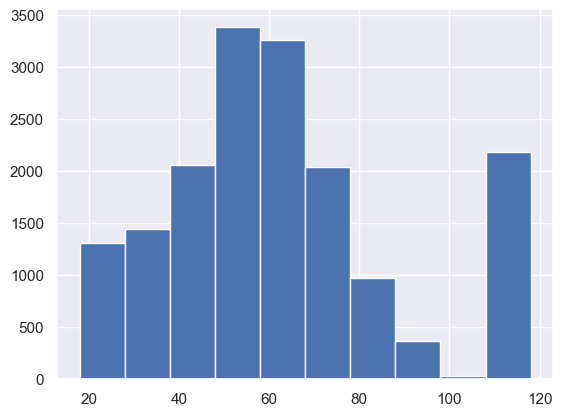

In [21]:
plt.hist(profile['age'], bins=10);

In [22]:
# checking the number of Male and Famale customers 
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

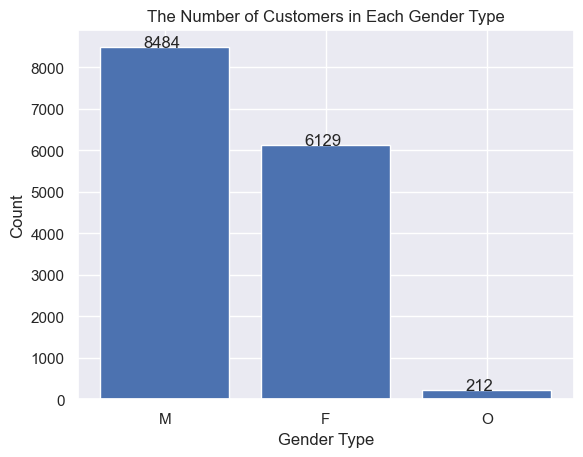

In [23]:
profile_gender_counts = profile.gender.value_counts()
x = ['M','F','O']
data = profile_gender_counts
plt.bar(x,height = data);
xlocs, xlabs = plt.xticks()
for i, v in enumerate(data):
    plt.text(xlocs[i] - 0.13, v , str(v))
plt.xlabel('Gender Type');
plt.ylabel('Count');
plt.title('The Number of Customers in Each Gender Type');

In [24]:
# compute the percentages of the gender distribution
total_counts = profile_gender_counts.sum()
gender_perc = round((profile_gender_counts/ total_counts)*100,2)
gender_perc

M    57.23
F    41.34
O     1.43
Name: gender, dtype: float64

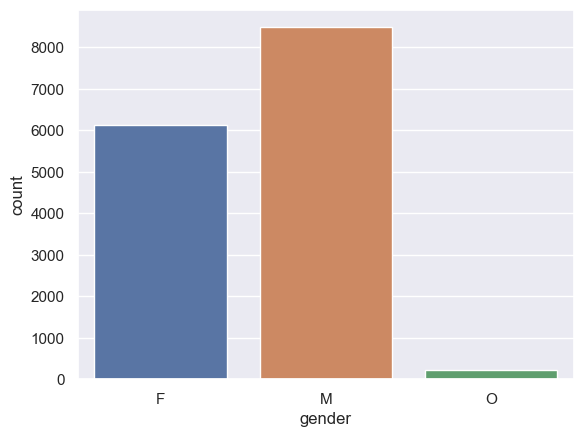

In [25]:
sns.countplot(x='gender',data=profile);

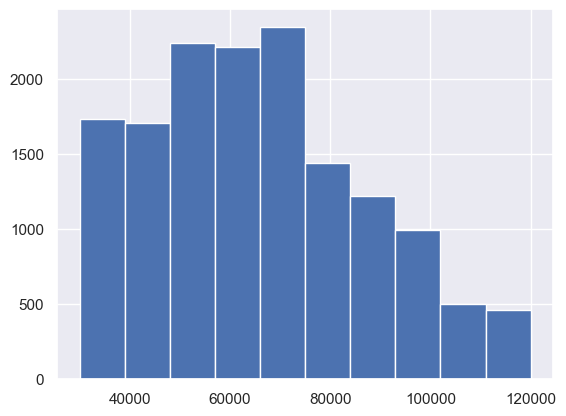

In [26]:
# checking the distribution of 'income' column
profile['income'].hist();

In [27]:
print('1- Number of customers with income = $76,000 is:', profile.age[profile['income']== 76000.0].count())
print('2- Number of customers with income = $75,000 is:', profile.age[profile['income']== 75000.0].count())
print('3- Number of customers with income = $50,000 is:', profile.age[profile['income']== 50000.0].count())
print('4- Number of customers with income = $49,000 is:', profile.age[profile['income']== 49000.0].count())

1- Number of customers with income = $76,000 is: 157
2- Number of customers with income = $75,000 is: 243
3- Number of customers with income = $50,000 is: 253
4- Number of customers with income = $49,000 is: 157


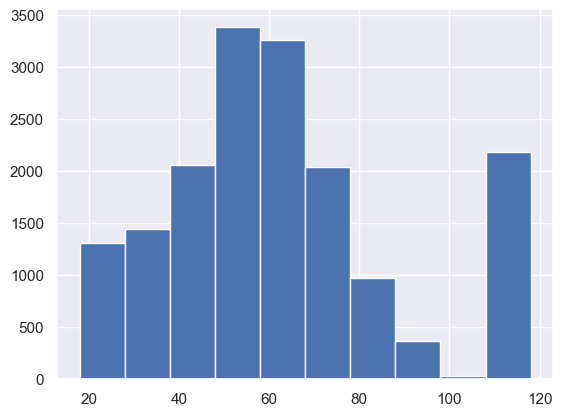

In [28]:
# getting the statitical summary of the 'age' column
####profile['age'].describe()
# get the count of each unique value in the 'age' column and sort that count in an descending order
# this will allow us to identify whether the value is an outlier or not
#######profile['age'].value_counts().sort_values(ascending=False)
# checking the distribution of 'age' column
profile['age'].hist();

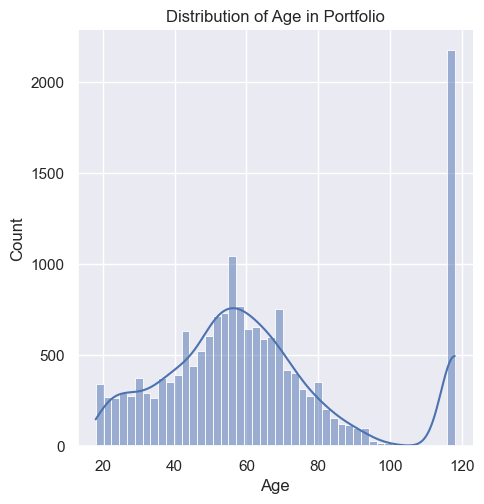

In [29]:
sns.displot(profile['age'],kde=True)
plt.title("Distribution of Age in Portfolio")
plt.xlabel("Age")
plt.ylabel("Count");

In [30]:
# checking the number of customers that are registered at the age = 118
profile['age'][profile['age'] == 118].count()

2175

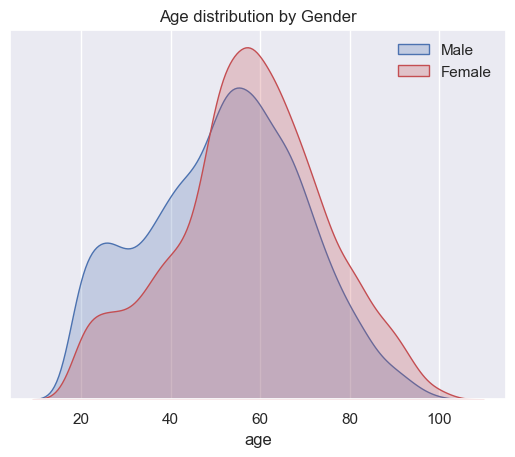

In [31]:
sns.kdeplot(profile[profile['gender']=='M']['age'],fill=True,color="b");
sns.kdeplot(profile[profile['gender']=='F']['age'],fill=True,color="r");
plt.title('Age distribution by Gender')
plt.gca().get_yaxis().set_visible(False)
plt.legend(['Male','Female'],frameon=False);

In [32]:
# checking the count of values of the rows into which the customers age = 118
profile[profile['age']==118].count()

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

It is clear that customers with age 118 has no values on both the 'gender' and 'income' columns. To double check this we would do the following:

In [33]:
# creating a dataframe with only the customers with age = 118 
# this data frame will include the coressponding gender and income columns to the customers with age = 118
df_118 = profile[['gender','income','age']][profile['age']==118]

In [34]:
# getting a quick look on the profile data of customers registered at age =118 
print(df_118.head())
print('1-The shape of this dataframe is' ,df_118.shape)
print('2-The number of null values in the "gender" column is:', df_118['gender'].isnull().sum())
print('3-The number of null values in the "income" column is:', df_118['income'].isnull().sum())

  gender  income  age
0   None     NaN  118
2   None     NaN  118
4   None     NaN  118
6   None     NaN  118
7   None     NaN  118
1-The shape of this dataframe is (2175, 3)
2-The number of null values in the "gender" column is: 2175
3-The number of null values in the "income" column is: 2175


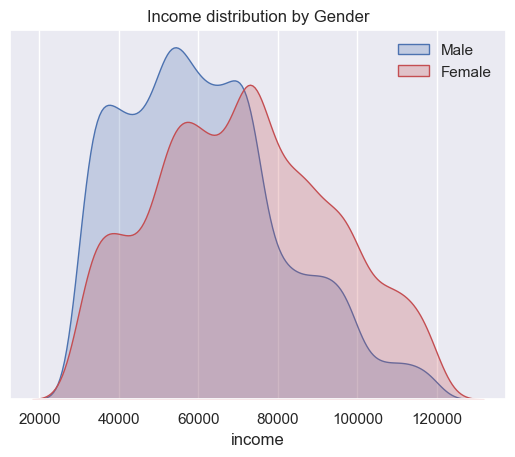

In [35]:
sns.kdeplot(profile[profile['gender']=='M']['income'],fill=True,color="b")
sns.kdeplot(profile[profile['gender']=='F']['income'],fill=True,color="r");
plt.title('Income distribution by Gender')
plt.gca().get_yaxis().set_visible(False)
plt.legend(['Male','Female'],frameon=False);

### Exploration and Visualization for the Profile Dataset shows the following:
* The dataset has 5 columns and 17,000 rows.
* The dataset has no duplicated rows.
* The dataset has 2175 missing values on each of: ‘gender’, ’income’ variables.
* The customers ages range from 18 to 101. Although that 2175 customers were registered at age 118 but I stilI considered this specific age an outlier b/c it appears clearly that there is something wrong related with these 2175 rows in the dataset.
* Exploring and visualizing three variables in this dataset: ‘gender’,’income’ and ’age’, allowed me to get the following conclusion:
  * The missing values in 'gender' and ‘income’ variables which are are related solely and specifically with the 2175 customers registered at age 118. In other words, customers at age 118 has no registered ‘gender’ and ‘income’. This needs to be cleaned in the Data Preprocessing (Wrangling/Cleaning) Section.
  * Customers income ranges from 30,000 and 120,000 with most of the customers’ incomes fall between 50,000 and 75,0000.
  * According to the available data, There are three ‘gender’ categories into which the customers falls in ( M, F and O). Keeping in our mind the above observation that there are 2175 missing values, Male Customers (8484 men) are more than Female Customers(6129 women) with 57% of customers are Males compared to 41% Females. However, there are 212 customers chose “O” as their gender.


### c. Transcript dataset

In [36]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [37]:
# checking the number of rows and columns of the dataset
transcript.shape

(306534, 4)

In [38]:
# checking for duplicates
transcript.columns.duplicated().sum()

0

In [39]:
# checking the columns' titles and datatypes 
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [40]:
# checking for the existence of missing values(NaNs)
transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [41]:
# getting the types of events of the transcripts 
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [42]:
# checking the count of each event type
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [43]:
# creating a dataframe to include ONLY the 'transaction' event
df_transaction = transcript[transcript['event'] == 'transaction']

In [44]:
#getting a random sample of 'value' column
df_transaction['value'].sample(100)

225071     {'amount': 1.71}
13361      {'amount': 5.98}
299857     {'amount': 0.42}
172399    {'amount': 23.44}
29639      {'amount': 0.33}
                ...        
282771    {'amount': 26.02}
72326      {'amount': 6.38}
182964     {'amount': 2.54}
288390    {'amount': 15.12}
262917     {'amount': 3.48}
Name: value, Length: 100, dtype: object

### Exploration for the Transcript Dataset shows the following:
* The dataset has 4 columns and 306,534 rows.
* The dataset has no duplicated rows nor missing values.
* The ‘value’ column is a dictionary in which we can apply some kind of Feature Engineering to extract useful data that would surely contribute in the success of our future model. This step will be done through the Data Preprocessing (Wrangling/Cleaning) Section.
* There are four types of events in this dataset: ‘transaction’, ’ offer received’, ‘offer viewed’ and ‘offer completed’.
* All the events that are classified as ‘transaction’ do not have an ‘offerid’ within its ‘value’ column.

<a id="4"></a>
# 4.Cleaning Up & Data Preprocessing

In [45]:
def clean_profile(profile):
    
    '''
    Function to clean profile dataframe.
    
    INPUT - Profile dataframe
    
    OUTPUT - Return cleaned version of profile dataframe
    
    '''
    
    #Convert became_member_on to datetime
    profile['became_member_on'] = pd.to_datetime(profile['became_member_on'],format='%Y%m%d')

    
    #Convert users with age 118 to np.nan
    profile['age'] = profile['age'].apply(lambda x: np.nan if x ==118 else x)
    
    #Create dummy columns for gender
    
    genders = pd.get_dummies(profile['gender'],prefix = "gender", prefix_sep = "-")
    
    profile = pd.concat([profile,genders],axis=1)
    
    #Change id column name to offer id
    
    profile.rename(columns={'id':'customer_id'},inplace=True)
    
    #Extract the number of days a user has been a member of the rewards app.
    today = pd.to_datetime(datetime.date.today().strftime('%Y%m%d'))
    
    ####creating a new column representing the age group to which the customer belongs 
    profile['age_group'] = pd.cut(profile['age'], bins=[17, 22, 35, 60, 103],labels=['teenager', 'young-adult', 'adult', 'elderly'])
    
    # replacing the 'age_group' categorical labels by numerical labels
    labels_age_group = profile['age_group'].astype('category').cat.categories.tolist()
    replace_map_comp_age_group = {'age_group' : {k: v for k,v in zip(labels_age_group,list(range(1,len(labels_age_group)+1)))}}
    # replace categorical labels in 'age_group' column with numerical labels
    profile.replace(replace_map_comp_age_group, inplace=True)
    
    # creating a new column representing the age group to which the customer belongs 
    profile['income_range'] = pd.cut(profile['income'], bins=[29999, 60000, 90000, 120001],labels=['average', 'above-average', 'high'])
    # replacing the 'income_range' categorical labels by numerical labels
    labels_income_range = profile['income_range'].astype('category').cat.categories.tolist()
    replace_map_comp_income_range = {'income_range' : {k: v for k,v in zip(labels_income_range,list(range(1,len(labels_income_range)+1)))}}
    
    # replacing categorical labels in 'income_range' column with numerical labels
    profile.replace(replace_map_comp_income_range, inplace=True)
    
    #profile['became_member_on'] = (today - profile['became_member_on']) / np.timedelta64(1,'D')
    
    
    return profile
    
profile = clean_profile(profile)
profile.head()

,gender,age,customer_id,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,None,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,0,0,NaN,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,0,0,3,3
2,None,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,0,0,0,NaN,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0,4,3
4,None,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,0,0,0,NaN,NaN


In [46]:
profile.columns

Index(['gender', 'age', 'customer_id', 'became_member_on', 'income',
       'gender-F', 'gender-M', 'gender-O', 'age_group', 'income_range'],
      dtype='object')

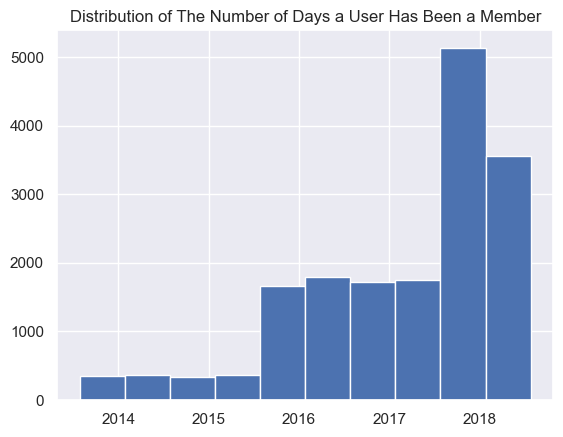

In [47]:
plt.hist(profile['became_member_on']);
plt.title('Distribution of The Number of Days a User Has Been a Member');

In [48]:
def clean_portfolio_ml(portfolio):
    
    '''
    Function to clean the portoflio dataset. Encode the categorical variables.
    
    Input - Portfolio dataframe
    
    Output - Portfolio dataframe with categorical variables handled
    '''
    
    #Apply one hot encodings to channels column
    
    #Email
    portfolio['email'] = portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
    #Mobile
    portfolio['mobile'] = portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
    #Social
    portfolio['social'] = portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
    #Web
    portfolio['web'] = portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
    # changing the unit of 'duration' column from days to hours
    #portfolio['duration'] = portfolio['duration']*24
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler() # default=(0, 1)
    numerical = ['difficulty','reward']
    
    ###print(portfolio.columns)

    #features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
    portfolio[numerical] = scaler.fit_transform(portfolio[numerical])
    
    #Create dummy columns for offer_type
    offer_types = pd.get_dummies(portfolio['offer_type'], prefix ='offer_type', prefix_sep='-')
    
    portfolio = pd.concat([portfolio.drop(['offer_type','channels'],axis=1),offer_types],axis=1)
      
    portfolio.rename(columns={'id':'offer_id'},inplace=True)
    
    return portfolio
portfolio_ml = clean_portfolio_ml(portfolio)
portfolio_ml.head()

,reward,difficulty,duration,offer_id,email,mobile,social,web,offer_type-bogo,offer_type-discount,offer_type-informational
0,1.0,0.50,7,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,1.0,0.50,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0.0,0.00,4,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,0.5,0.25,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,0.5,1.00,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0


In [49]:
def clean_portfolio_ft(portfolio):
    
    '''
    Function to clean the portoflio dataset. Encode the categorical variables.
    
    Input - Portfolio dataframe
    
    Output - Portfolio dataframe with categorical variables handled
    '''
    
    #Apply one hot encodings to channels column
    
    #Email
    portfolio['email'] = portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
    #Mobile
    portfolio['mobile'] = portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
    #Social
    portfolio['social'] = portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
    #Web
    portfolio['web'] = portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
    # changing the unit of 'duration' column from days to hours
    #portfolio['duration'] = portfolio['duration']*24
    # Initialize a scaler, then apply it to the features
    scaler = MinMaxScaler() # default=(0, 1)
    numerical = ['difficulty','reward']
    
    ###print(portfolio.columns)

    #features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
    portfolio[numerical] = scaler.fit_transform(portfolio[numerical])
    
    #Create dummy columns for offer_type
    offer_types = pd.get_dummies(portfolio['offer_type'], prefix ='offer_type', prefix_sep='-')
    
    ####portfolio = pd.concat([portfolio.drop(['offer_type','channels'],axis=1),offer_types],axis=1)
      
    portfolio.rename(columns={'id':'offer_id'},inplace=True)
    
    return portfolio
portfolio_ft = clean_portfolio_ft(portfolio)
portfolio_ft.head()

,reward,channels,difficulty,duration,offer_type,offer_id,email,mobile,social,web
0,1.0,"[email, mobile, social]",0.50,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,1.0,"[web, email, mobile, social]",0.50,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0.0,"[web, email, mobile]",0.00,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,0.5,"[web, email, mobile]",0.25,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,0.5,"[web, email]",1.00,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [50]:
def clean_transcript_ft(transcript):
    
    #Extract offer_id from value column for feature check 
    transcript['offer_id'] = transcript['value'].apply(lambda x: x['offer_id'] if 'offer_id' in x else (x['offer id'] if 'offer id' in x else None))
    
    #create two seperate columns for reward and amount
    
    for i in ['reward','amount']:
        transcript[i] = transcript['value'].apply(lambda x:x[i] if i in x else None)
    
    ###transcript.drop('value',axis=1,inplace=True)
    
    transcript.drop('reward',axis=1,inplace=True)
    
    transcript.rename(columns={'person':'customer_id'},inplace=True)
    
    transcript['event'] = transcript['event'].str.replace(' ', '-')

    temp = pd.get_dummies(transcript['event'])
    transcript = pd.concat([transcript, temp], axis=1)
    
    #Convert transcript time from hours to days
    transcript['time'] = transcript['time'] / 24
    
    return transcript
transcript_ft = clean_transcript_ft(transcript)
transcript_ft.head()

,customer_id,event,value,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer-received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,offer-received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer-received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer-received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0,1,0,0


In [51]:
def clean_transcript_ml(transcript):
    
    #Extract offer_id from value column for ml
    transcript['offer_id'] = transcript['value'].apply(lambda x: x['offer_id'] if 'offer_id' in x else (x['offer id'] if 'offer id' in x else None))
    
    #create two seperate columns for reward and amount
    
    for i in ['reward','amount']:
        transcript[i] = transcript['value'].apply(lambda x:x[i] if i in x else None)
    
    #####transcript.drop('value',axis=1,inplace=True)
    
    transcript.drop('reward',axis=1,inplace=True)
    
    transcript.rename(columns={'person':'customer_id'},inplace=True)
    
    transcript['event'] = transcript['event'].str.replace(' ', '-')

    #temp = pd.get_dummies(transcript['event'])
    #transcript = pd.concat([transcript, temp], axis=1)
    
    #Convert transcript time from hours to days
    transcript['time'] = transcript['time'] / 24
    
    return transcript
transcript_ml = clean_transcript_ml(transcript)
transcript_ml.head()

,customer_id,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer-received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer-received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer-received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer-received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [52]:
def merge_dataframes_ml(profile,portfolio,transcript):
    
    '''
    Function to merge all the dataframes together for ml.
    
    Input - profile, portfolio and transcript dataframes
    
    Output - single dataframe
    
    '''
    
    overall = transcript_ml.merge(portfolio_ml,how='left',on='offer_id')
    
    overall = overall.merge(profile,how='left',on='customer_id')
    
    
    return overall


overall_df_ml = merge_dataframes_ml(profile,portfolio,transcript)

overall_df_ml.head()

,customer_id,event,value,time,offer_id,amount,reward,difficulty,duration,email,...,offer_type-informational,gender,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0.5,0.25,7.0,1.0,...,0.0,F,75.0,2017-05-09,100000.0,1,0,0,4,3
1,a03223e636434f42ac4c3df47e8bac43,offer-received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0.5,1.00,10.0,1.0,...,0.0,None,NaN,2017-08-04,NaN,0,0,0,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer-received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,2906b810c7d4411798c6938adc9daaa5,NaN,0.2,0.50,7.0,1.0,...,0.0,M,68.0,2018-04-26,70000.0,0,1,0,4,2
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer-received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,0.2,0.50,10.0,1.0,...,0.0,None,NaN,2017-09-25,NaN,0,0,0,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer-received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,1.0,0.50,5.0,1.0,...,0.0,None,NaN,2017-10-02,NaN,0,0,0,NaN,NaN


In [53]:
def merge_dataframes_ft(profile,portfolio,transcript):
    
    '''
    Function to merge all the dataframes together for feature check.
    
    Input - profile, portfolio and transcript dataframes
    
    Output - single dataframe
    
    '''
    
    overall = transcript_ft.merge(portfolio_ft,how='left',on='offer_id')
    
    overall = overall.merge(profile,how='left',on='customer_id')
    
    
    return overall


overall_df_ft = merge_dataframes_ft(profile,portfolio,transcript)

overall_df_ft.head()

,customer_id,event,value,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction,...,web,gender,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0,...,1.0,F,75.0,2017-05-09,100000.0,1,0,0,4,3
1,a03223e636434f42ac4c3df47e8bac43,offer-received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,0,1,0,0,...,1.0,None,NaN,2017-08-04,NaN,0,0,0,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer-received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,2906b810c7d4411798c6938adc9daaa5,NaN,0,1,0,0,...,1.0,M,68.0,2018-04-26,70000.0,0,1,0,4,2
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer-received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN,0,1,0,0,...,1.0,None,NaN,2017-09-25,NaN,0,0,0,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer-received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,0,1,0,0,...,1.0,None,NaN,2017-10-02,NaN,0,0,0,NaN,NaN


<a id="5"></a>
# 5.Feature Engineering on Merged Data

In [54]:
###overall_df.columns

### Some Salient Points in the Feature Extracted Data as a Prelude to what we will perform:


Steps we perform to feature engineer on the final merged data frame:
* Rename 'id' column to 'offer_id'.
* Change the unit of 'duration' column from days to hours.
* Rename 'duration' column to 'duration_h' representing that the unit of measurment is 'hours'
* Normalize 'difficulty' and 'reward' features using the MinMaxScaler.
* Create dummy variables from the 'channels' column using one-hot encoding then Drop the 'channels' column.
* Replace the 'offer_id' by more easy ids.
* Replace the 'offer_type' by integers representing each offer type as follow:
  1.  bogo
  2.  discount
  3.  informational
  
* Preprocessing 'id' Feature:

  * Rename 'id' column name to 'customer_id'.
  * Re-arrange the columns to have 'customer_id' column the first column in dataset.
  * Replace the customer_id string values with easiest numerical values.

* Preprocessing 'age' Feature:

  * Replace age = 118 by NaN value.
  * Remove customers (drop rows) with no 'age', 'gender' and 'income'. 
  * Change the datatype of 'age' and 'income' columns to 'int'.
  * Create a new column 'age_group' that includes the age_group to which each customer belongs
  * Replace the 'age_group' categorical label by a corresponding numerical label, as follows:
    * 1 : teenager
    * 2 : young-adult
    * 3 : adult
    * 4 : elderly

* Preprocessing 'income' Feature:

  * Create a new column 'income_range' that includes the income-range to which the customer's income belongs.
  * Replace the 'income_range' categorical label by a corresponding numerical label, as follows:
    * 1 : average (30,000 - 60,000)
    * 2 : above-average (60,0001 - 90,000)
    * 3 : high (more than 90,000)

* Preprocessing 'gender' Feature:

  * Replace the 'gender' categorical labels with coressponding numerical label, as follows:
    * 1 : F (Female)
    * 2 : M (Male)
    * 3 : O

* Preprocessing 'became_member_on' Feature:

  * Change the datatype of 'became_member_on' column from int to date and put it in the appropriate format in order to have a readable date format that can be analyzed easily if requiered.
  * Add a new column 'start_year', that will present the year at which the customer become a member, to the existing dataset (for further analysis).
  * Add a new column 'membership_days' ,that will present the number of days since the customer became a member, to the existing dataset (for further analysis).
  * Create a new column 'member_type' representing the type of the member: new, regular or loyal depending on the number of his 'membership_days'.
  * Replace the 'member_type' categorical label by a corresponding numerical label, as follows:
    * 1 : new (member since 1000 days or less)
    * 2 : regular (1001 - 1,600 days of membership)
    * 3 : loyal (more than 1,600 days of membership)

* Preprocess 'person' Feature:

    * Rename 'person' column to 'customer_id'.
    * Replace the categorical values in 'customer_id' column by the newly initiated numerical values corresponding with each customer id, which resulted from the previous preprocessing for 'id' feature

* Preprocess 'value' Feature:

    * Extract each key that exists in the 'value' column to a seperate column than dropping the 'value' column.
    * Fill all the NaNs in the 'offer_id' column with 'N/A' values (i.e. Not Applicable).
    * Drop the 'value' column since it is no longer needed.

* Preprocess 'event' Feature:

    * Excluding all events of 'transaction' or 'offer received' from our clean_transcript dataset.
    * Replace the 'event' categorical labels with coressponding numerical label, as follows:
      * 1 : offer completed
      * 2 : offer viewed

* Preprocess 'offer_id' Feature:

    * Replace the categorical values in the 'offer_id' column by the corresponding numerical values used initiated during Preprocessing Portfolio Dataset
    
    * Since we are interested in the events related with the offers, i.e offer received, offer viewed, offer completed, we will remove all events of 'transaction' because they are not directly related with offers.
* we will exclude all the events of 'offer recieved',since I want to focus on whether the customer:
    * Only viewed the offer (offer viewed)
    * viewed the offer and then completed it (offer viewed)&(offer completed).
    
We now have a single dataframe which includes information about the offer and information about the customer for every combination of offers and customers.We also determined whether an offer was successful - which was when an offer was completed and viewed by the customer.

In [55]:
def change_offer_id(overall_df):
    
    '''
    Funtion to change the offer ids into a more readable form e.g offer 1, offer 2.
    
    Input - overall_df which is the combined dataframe from all 3 datasets.
    
    Output - overall_df with altered offer ids.
    
    '''
    
    unique_ids = list(overall_df['offer_id'].unique())
    
    for i in range(len(unique_ids)):
        
        overall_df['offer_id'] = overall_df['offer_id'].apply(lambda x: f'Offer {i+1}' if x == unique_ids[i] else x)
        
            
    return overall_df
            
overall_mdf_ft = change_offer_id(overall_df_ft)
overall_mdf_ft.head()

,customer_id,event,value,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction,...,web,gender,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,Offer 1,NaN,0,1,0,0,...,1.0,F,75.0,2017-05-09,100000.0,1,0,0,4,3
1,a03223e636434f42ac4c3df47e8bac43,offer-received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,Offer 2,NaN,0,1,0,0,...,1.0,None,NaN,2017-08-04,NaN,0,0,0,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer-received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,Offer 3,NaN,0,1,0,0,...,1.0,M,68.0,2018-04-26,70000.0,0,1,0,4,2
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer-received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,Offer 4,NaN,0,1,0,0,...,1.0,None,NaN,2017-09-25,NaN,0,0,0,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer-received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,Offer 5,NaN,0,1,0,0,...,1.0,None,NaN,2017-10-02,NaN,0,0,0,NaN,NaN


In [56]:
overall_mdf_ml = change_offer_id(overall_df_ml)
overall_mdf_ml.head()

,customer_id,event,value,time,offer_id,amount,reward,difficulty,duration,email,...,offer_type-informational,gender,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,Offer 1,NaN,0.5,0.25,7.0,1.0,...,0.0,F,75.0,2017-05-09,100000.0,1,0,0,4,3
1,a03223e636434f42ac4c3df47e8bac43,offer-received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,Offer 2,NaN,0.5,1.00,10.0,1.0,...,0.0,None,NaN,2017-08-04,NaN,0,0,0,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,offer-received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,Offer 3,NaN,0.2,0.50,7.0,1.0,...,0.0,M,68.0,2018-04-26,70000.0,0,1,0,4,2
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer-received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,Offer 4,NaN,0.2,0.50,10.0,1.0,...,0.0,None,NaN,2017-09-25,NaN,0,0,0,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer-received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,Offer 5,NaN,1.0,0.50,5.0,1.0,...,0.0,None,NaN,2017-10-02,NaN,0,0,0,NaN,NaN


In [57]:
df_ft = overall_mdf_ft.copy()
df_ft.columns

Index(['customer_id', 'event', 'value', 'time', 'offer_id', 'amount',
       'offer-completed', 'offer-received', 'offer-viewed', 'transaction',
       'reward', 'channels', 'difficulty', 'duration', 'offer_type', 'email',
       'mobile', 'social', 'web', 'gender', 'age', 'became_member_on',
       'income', 'gender-F', 'gender-M', 'gender-O', 'age_group',
       'income_range'],
      dtype='object')

In [58]:
df_ml = overall_mdf_ml.copy()
df_ml.columns

Index(['customer_id', 'event', 'value', 'time', 'offer_id', 'amount', 'reward',
       'difficulty', 'duration', 'email', 'mobile', 'social', 'web',
       'offer_type-bogo', 'offer_type-discount', 'offer_type-informational',
       'gender', 'age', 'became_member_on', 'income', 'gender-F', 'gender-M',
       'gender-O', 'age_group', 'income_range'],
      dtype='object')

In [59]:
def clean_df(df):
    clean_df = df[df['gender'].notnull()].copy() #drop null values
   ##### clean_df.drop('id', axis=1, inplace=True) #drop the repeated column after combine
    
    #change became_member_on to datetime formate
    clean_df['became_member_on'] = pd.to_datetime(clean_df['became_member_on'], format='%Y%m%d')
    # create a new column that has the year which customers become members
    clean_df['year'] = clean_df['became_member_on'].apply(lambda x: str(x)[:4])
    
    #change the time in hours to days, rounding up
    clean_df['days'] = clean_df['time'].apply(lambda x: int(x / 24) + (x % 24 > 0))
    
    #clean the value column
   # clean_df['offer_id'] = clean_df['value'].apply(lambda x: x['offer id'] if 'offer id' in x else x['offer_id'] if 'offer_id' in x else np.nan)
    clean_df['amount'] = clean_df['value'].apply(lambda x: x.get('amount', 0))
    clean_df.drop(['value'], axis=1, inplace=True)
    
    event_ids = clean_df['event'].unique()
    event_dict = pd.Series(event_ids).to_dict()
    
    #map event_ids to the encoded event ids
    ###clean_df['event_id'] = clean_df['event'].map(event_dict)
    
    clean_df = clean_df.reset_index(drop=True)
    
    return clean_df

In [60]:
findf_ft = clean_df(df_ft)
findf_ft.columns

Index(['customer_id', 'event', 'time', 'offer_id', 'amount', 'offer-completed',
       'offer-received', 'offer-viewed', 'transaction', 'reward', 'channels',
       'difficulty', 'duration', 'offer_type', 'email', 'mobile', 'social',
       'web', 'gender', 'age', 'became_member_on', 'income', 'gender-F',
       'gender-M', 'gender-O', 'age_group', 'income_range', 'year', 'days'],
      dtype='object')

In [61]:
findf_ft.head()

,customer_id,event,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction,reward,...,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range,year,days
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0.0,Offer 1,0.0,0,1,0,0,0.5,...,75.0,2017-05-09,100000.0,1,0,0,4,3,2017,0
1,e2127556f4f64592b11af22de27a7932,offer-received,0.0,Offer 3,0.0,0,1,0,0,0.2,...,68.0,2018-04-26,70000.0,0,1,0,4,2,2018,0
2,389bc3fa690240e798340f5a15918d5c,offer-received,0.0,Offer 6,0.0,0,1,0,0,0.5,...,65.0,2018-02-09,53000.0,0,1,0,4,1,2018,0
3,2eeac8d8feae4a8cad5a6af0499a211d,offer-received,0.0,Offer 8,0.0,0,1,0,0,0.0,...,58.0,2017-11-11,51000.0,0,1,0,3,1,2017,0
4,aa4862eba776480b8bb9c68455b8c2e1,offer-received,0.0,Offer 2,0.0,0,1,0,0,0.5,...,61.0,2017-09-11,57000.0,1,0,0,4,1,2017,0


In [62]:
findf_ml = clean_df(df_ml)
findf_ml.columns

Index(['customer_id', 'event', 'time', 'offer_id', 'amount', 'reward',
       'difficulty', 'duration', 'email', 'mobile', 'social', 'web',
       'offer_type-bogo', 'offer_type-discount', 'offer_type-informational',
       'gender', 'age', 'became_member_on', 'income', 'gender-F', 'gender-M',
       'gender-O', 'age_group', 'income_range', 'year', 'days'],
      dtype='object')

In [63]:
findf_ml.head()

,customer_id,event,time,offer_id,amount,reward,difficulty,duration,email,mobile,...,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range,year,days
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0.0,Offer 1,0.0,0.5,0.25,7.0,1.0,1.0,...,75.0,2017-05-09,100000.0,1,0,0,4,3,2017,0
1,e2127556f4f64592b11af22de27a7932,offer-received,0.0,Offer 3,0.0,0.2,0.50,7.0,1.0,1.0,...,68.0,2018-04-26,70000.0,0,1,0,4,2,2018,0
2,389bc3fa690240e798340f5a15918d5c,offer-received,0.0,Offer 6,0.0,0.5,0.25,5.0,1.0,1.0,...,65.0,2018-02-09,53000.0,0,1,0,4,1,2018,0
3,2eeac8d8feae4a8cad5a6af0499a211d,offer-received,0.0,Offer 8,0.0,0.0,0.00,4.0,1.0,1.0,...,58.0,2017-11-11,51000.0,0,1,0,3,1,2017,0
4,aa4862eba776480b8bb9c68455b8c2e1,offer-received,0.0,Offer 2,0.0,0.5,1.00,10.0,1.0,0.0,...,61.0,2017-09-11,57000.0,1,0,0,4,1,2017,0


In [64]:
#Let's see the orders of the variables
print((findf_ft['offer_type'].unique()), (findf_ft['event'].unique()), findf_ft['gender'].unique(), findf_ft['year'].unique())

['bogo' 'discount' 'informational' nan] ['offer-received' 'offer-viewed' 'transaction' 'offer-completed'] ['F' 'M' 'O'] ['2017' '2018' '2016' '2013' '2015' '2014']


### Cleaning Schema - turn categorical data to numerical for analysis

* event - 
    - 0-'offer received'
    - 1-'offer viewed'
    - 2-'offer completed'
    - 3-'transaction'
* gender - 
    - 0-F
    - 1-M
    - 3-O
* channels -                      
    - 0-[web, email]
    - 1-[email, mobile, social] 
    - 2-[web, email, mobile]
    - 3-[web, email, mobile, social]
* offer_type - 
    - 0-'bogo'
    - 2-'informational'
    - 3-'discount'
* year -
    - 0-'2013'
    - 1-'2014'
    - 2-'2015'
    - 3-'2016'
    - 4-'2017'
    - 5-'2018'  
    
* Mapping of Numerical values for ‘age_group’ feature:
  * teenager
  * young-adult
  * adult
  * elderly
* Mapping of Numerical values for ‘income_range’ feature:
  * average (30,000 - 60,000)
  * above-average (60,0001 - 90,000)
  * high (more than 90,000)


In [65]:
def cate2num(df, cols):
    """
    input: 
    df: the dataframe
    cols: a list of cols that are categorical variabls and want to turn into integers. However order does not matter
    for these categorical variables.
    
    output:
    dataframe with old columns + additional columns that turned categorial variables into numbers.
    The numbers only indicates different categories, not orders.
    """
    for col in cols:
        #get all the unique categories in the column
        array = df[col].unique()
        
        #get the numbers of categories
        value_nums = len(array)
        
        #create new column
        df[col+'_id'] = df[col]

        for i in range(value_nums):
            #replace the variable with a number in the newly created column
            df[col+'_id'] = np.where(df[col]==array[i] , i, df[col+'_id'])
    
    return df


In [66]:
def clean_allcat(df, cols):
    """
    df: the df you want to clean
    cols: the cols that can be cleaned by using cate2num
    
    output:
    a dataframe with all orginal columns + new columns that turned the following categorical columns into
    numerical values.
    
    columns are ['gender', 'event', 'offer_type', 'year', channels']
    
    """
    #normal cat variables to numbers
    cleaned_df = cate2num(df, cols)
    
    #####cleaned_df = df
    
    #years
    years = df['year'].unique()
    year_sorted = sorted([int(x) for x in list(years)])
    cleaned_df['year_id'] = df['year']
    for i in range(len(year_sorted)):
        cleaned_df['year_id'] = np.where(cleaned_df['year_id']==str(year_sorted[i]) , i, cleaned_df['year_id'])

    #channelId
    col = 'channels'
    channelTye_id = df[col].copy()
    length = len(df)
    
    for x in range(length):
        if df[col][x] == ['web', 'email', 'mobile', 'social']:
            channelTye_id[x] = 3
        elif df[col][x] == ['web', 'email', 'mobile']:
            channelTye_id[x] = 2
        elif df[col][x] == ['email', 'mobile', 'social']:
            channelTye_id[x] = 1
        elif df[col][x] == ['web', 'email']:
            channelTye_id[x] = 0
     
    cleaned_df['channelTye_id'] = channelTye_id

    cleaned_df['event_id'] = cleaned_df['event'].map({'offer-received':0,'offer-viewed':1,
                                                    'offer-completed':2,'transaction':3})
    cleaned_df['offer_type_id'] = cleaned_df['offer_type'].map({'bogo':0, 
                                                    'discount':3, 'informational':2})
    
    cleaned_df['gender_id'] = cleaned_df['gender'].map({'F':0, 
                                                    'M':1, 'O':3})   
    cleaned_df['year_id'] = cleaned_df['year'].map({'2013':0, 
                                                    '2014':1, '2015':2,
                                                   '2016':3, '2017':4,'2018':5})
    
    cleaned_df['offer_type_id'] = cleaned_df['offer_type_id'].replace(np.nan , -1)
    
    cleaned_df['offer_type_id'] = cleaned_df['offer_type_id'].astype(int)

    return cleaned_df

In [67]:
featEng_data = clean_allcat(findf_ft, ['gender', 'event', 'offer_type'])
featEng_data.columns

Index(['customer_id', 'event', 'time', 'offer_id', 'amount', 'offer-completed',
       'offer-received', 'offer-viewed', 'transaction', 'reward', 'channels',
       'difficulty', 'duration', 'offer_type', 'email', 'mobile', 'social',
       'web', 'gender', 'age', 'became_member_on', 'income', 'gender-F',
       'gender-M', 'gender-O', 'age_group', 'income_range', 'year', 'days',
       'gender_id', 'event_id', 'offer_type_id', 'year_id', 'channelTye_id'],
      dtype='object')

In [68]:
featEng_data['offer_type_id'].unique()

array([ 0,  3,  2, -1])

In [69]:
featEng_data.head()

,customer_id,event,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction,reward,...,gender-O,age_group,income_range,year,days,gender_id,event_id,offer_type_id,year_id,channelTye_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0.0,Offer 1,0.0,0,1,0,0,0.5,...,0,4,3,2017,0,0,0,0,4,2
1,e2127556f4f64592b11af22de27a7932,offer-received,0.0,Offer 3,0.0,0,1,0,0,0.2,...,0,4,2,2018,0,1,0,3,5,2
2,389bc3fa690240e798340f5a15918d5c,offer-received,0.0,Offer 6,0.0,0,1,0,0,0.5,...,0,4,1,2018,0,1,0,0,5,3
3,2eeac8d8feae4a8cad5a6af0499a211d,offer-received,0.0,Offer 8,0.0,0,1,0,0,0.0,...,0,3,1,2017,0,1,0,2,4,2
4,aa4862eba776480b8bb9c68455b8c2e1,offer-received,0.0,Offer 2,0.0,0,1,0,0,0.5,...,0,4,1,2017,0,0,0,3,4,0


In [70]:
transcript_ml.head()

,customer_id,event,value,time,offer_id,amount
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,a03223e636434f42ac4c3df47e8bac43,offer-received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,e2127556f4f64592b11af22de27a7932,offer-received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0.0,2906b810c7d4411798c6938adc9daaa5,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer-received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0.0,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,68617ca6246f4fbc85e91a2a49552598,offer-received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [71]:
def transform_DF(mydf):
    '''
    Function to transform transcript dataframe to return a dataframe where it shows 
    each successful and unsuccesful offer.
    
    Input - Transcript dataframe 
    
    Output - transformed transcript dataframe
     
    '''
    
    offer_customer = mydf.groupby(['customer_id','offer_id','event'])['time'].count().unstack()
    
    offer_customer.reset_index(level=[0,1],inplace = True)

    #Replace nan values with 0.0
    
    offer_customer.fillna(0.0, inplace = True)
    
    #Need to determine which offers where successful - where offer completed and offer viewed  are greater than 1.
    
    #We can multiply the two columns together and replace any values > 0 with 1.
    
    #This is an important step as some offers are completed but have not been viewed - meaning the offer did not cause the 
    #transaction.
    
    offer_customer['successful_offer'] = offer_customer['offer-completed'] * offer_customer['offer-viewed']
    
    offer_customer['successful_offer'] = offer_customer['successful_offer'].apply(lambda x: 1.0 if x > 0 else 0.0)
    
    offer_customer.drop(['offer-completed','offer-viewed','offer-received'],axis=1, inplace = True)
                                                        
                
    return offer_customer

grD_ft = transform_DF(featEng_data)
        
grD_ml = transform_DF(transcript_ml)

            

In [72]:
grD_ml.head()

event,customer_id,offer_id,successful_offer
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0.0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,0.0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0


In [73]:
grD_ft.head()

event,customer_id,offer_id,transaction,successful_offer
0,0009655768c64bdeb2e877511632db8f,Offer 10,0.0,0.0
1,0009655768c64bdeb2e877511632db8f,Offer 11,8.0,0.0
2,0009655768c64bdeb2e877511632db8f,Offer 3,0.0,0.0
3,0009655768c64bdeb2e877511632db8f,Offer 4,0.0,1.0
4,0009655768c64bdeb2e877511632db8f,Offer 6,0.0,1.0


In [74]:
featEng_data.head()

,customer_id,event,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction,reward,...,gender-O,age_group,income_range,year,days,gender_id,event_id,offer_type_id,year_id,channelTye_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0.0,Offer 1,0.0,0,1,0,0,0.5,...,0,4,3,2017,0,0,0,0,4,2
1,e2127556f4f64592b11af22de27a7932,offer-received,0.0,Offer 3,0.0,0,1,0,0,0.2,...,0,4,2,2018,0,1,0,3,5,2
2,389bc3fa690240e798340f5a15918d5c,offer-received,0.0,Offer 6,0.0,0,1,0,0,0.5,...,0,4,1,2018,0,1,0,0,5,3
3,2eeac8d8feae4a8cad5a6af0499a211d,offer-received,0.0,Offer 8,0.0,0,1,0,0,0.0,...,0,3,1,2017,0,1,0,2,4,2
4,aa4862eba776480b8bb9c68455b8c2e1,offer-received,0.0,Offer 2,0.0,0,1,0,0,0.5,...,0,4,1,2017,0,0,0,3,4,0


In [75]:
def finalMerge_ft(mfDT,grDT):
    
    '''
    Function to merge all the dataframes together.
    
    Input - profile, portfolio and transcript dataframes
    
    Output - single dataframe
    
    '''
    
    myF  = pd.merge(mfDT, grDT, how='inner',on=['customer_id','offer_id', 'transaction'])
    
    
    
    return myF


finProcD_ft = finalMerge_ft(featEng_data,grD_ft)

finProcD_ft.head()

,customer_id,event,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction,reward,...,age_group,income_range,year,days,gender_id,event_id,offer_type_id,year_id,channelTye_id,successful_offer
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0.00,Offer 1,0.0,0,1,0,0,0.5,...,4,3,2017,0,0,0,0,4,2,1.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer-viewed,0.25,Offer 1,0.0,0,0,1,0,0.5,...,4,3,2017,1,0,1,0,4,2,1.0
2,78afa995795e4d85b5d9ceeca43f5fef,offer-completed,5.50,Offer 1,0.0,1,0,0,0,0.5,...,4,3,2017,1,0,2,0,4,2,1.0
3,e2127556f4f64592b11af22de27a7932,offer-received,0.00,Offer 3,0.0,0,1,0,0,0.2,...,4,2,2018,0,1,0,3,5,2,0.0
4,e2127556f4f64592b11af22de27a7932,offer-viewed,0.75,Offer 3,0.0,0,0,1,0,0.2,...,4,2,2018,1,1,1,3,5,2,0.0


In [76]:
def finalMerge_ml(profileA,portfolioA,transcriptA):
    
    '''
    Function to merge all the dataframes together.
    
    Input - profile, portfolio and transcript dataframes
    
    Output - single dataframe
    
    '''
    
    myFml  =   transcriptA.merge(portfolioA,how='left',on='offer_id')
    
    myFml  =   myFml.merge(profileA,how='left',on='customer_id')
    
    
    
    return myFml


finProcD_ml = finalMerge_ml(profile,portfolio_ml,grD_ml)

finProcD_ml.head()

,customer_id,offer_id,successful_offer,reward,difficulty,duration,email,mobile,social,web,...,offer_type-informational,gender,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,0.0,0.2,0.50,7,1,1,0,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,0.0,0.0,0.00,4,1,1,0,1,...,1,M,33.0,2017-04-21,72000.0,0,1,0,2,2
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,0.0,0.0,0.00,3,1,1,1,0,...,1,M,33.0,2017-04-21,72000.0,0,1,0,2,2
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,0.5,0.25,5,1,1,1,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.2,0.50,10,1,1,1,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2


In [77]:
def change_offer_id(overall_df):
    
    '''
    Funtion to change the offer ids into a more readable form e.g offer 1, offer 2.
    
    Input - overall_df which is the combined dataframe from all 3 datasets.
    
    Output - overall_df with altered offer ids.
    
    '''
    
    unique_ids = list(overall_df['offer_id'].unique())
    
    for i in range(len(unique_ids)):
        
        overall_df['offer_id'] = overall_df['offer_id'].apply(lambda x: f'Offer {i+1}' if x == unique_ids[i] else x)
        
            
    return overall_df
            
finProcD_mlF= change_offer_id(finProcD_ml)
finProcD_mlF.head()

,customer_id,offer_id,successful_offer,reward,difficulty,duration,email,mobile,social,web,...,offer_type-informational,gender,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,0009655768c64bdeb2e877511632db8f,Offer 1,0.0,0.2,0.50,7,1,1,0,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2
1,0009655768c64bdeb2e877511632db8f,Offer 2,0.0,0.0,0.00,4,1,1,0,1,...,1,M,33.0,2017-04-21,72000.0,0,1,0,2,2
2,0009655768c64bdeb2e877511632db8f,Offer 3,0.0,0.0,0.00,3,1,1,1,0,...,1,M,33.0,2017-04-21,72000.0,0,1,0,2,2
3,0009655768c64bdeb2e877511632db8f,Offer 4,1.0,0.5,0.25,5,1,1,1,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2
4,0009655768c64bdeb2e877511632db8f,Offer 5,1.0,0.2,0.50,10,1,1,1,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2


In [78]:
finProcD_ft.to_csv('data/mergedData_ft.csv', index=False)

In [79]:
finProcD_mlF.to_csv('data/mergedData_ml.csv', index=False)

In [80]:
finalDF = finProcD_ft

In [81]:
finalML = finProcD_mlF

In [82]:
###myDF = finalDF.dropna(how='any',axis=0) ### non null DF

In [83]:
###myDF.shape

In [84]:
# check if we have any missing values 
####finalDF.info()
finalDF.head()

,customer_id,event,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction,reward,...,age_group,income_range,year,days,gender_id,event_id,offer_type_id,year_id,channelTye_id,successful_offer
0,78afa995795e4d85b5d9ceeca43f5fef,offer-received,0.00,Offer 1,0.0,0,1,0,0,0.5,...,4,3,2017,0,0,0,0,4,2,1.0
1,78afa995795e4d85b5d9ceeca43f5fef,offer-viewed,0.25,Offer 1,0.0,0,0,1,0,0.5,...,4,3,2017,1,0,1,0,4,2,1.0
2,78afa995795e4d85b5d9ceeca43f5fef,offer-completed,5.50,Offer 1,0.0,1,0,0,0,0.5,...,4,3,2017,1,0,2,0,4,2,1.0
3,e2127556f4f64592b11af22de27a7932,offer-received,0.00,Offer 3,0.0,0,1,0,0,0.2,...,4,2,2018,0,1,0,3,5,2,0.0
4,e2127556f4f64592b11af22de27a7932,offer-viewed,0.75,Offer 3,0.0,0,0,1,0,0.2,...,4,2,2018,1,1,1,3,5,2,0.0


In [85]:
finalML.head()

,customer_id,offer_id,successful_offer,reward,difficulty,duration,email,mobile,social,web,...,offer_type-informational,gender,age,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,0009655768c64bdeb2e877511632db8f,Offer 1,0.0,0.2,0.50,7,1,1,0,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2
1,0009655768c64bdeb2e877511632db8f,Offer 2,0.0,0.0,0.00,4,1,1,0,1,...,1,M,33.0,2017-04-21,72000.0,0,1,0,2,2
2,0009655768c64bdeb2e877511632db8f,Offer 3,0.0,0.0,0.00,3,1,1,1,0,...,1,M,33.0,2017-04-21,72000.0,0,1,0,2,2
3,0009655768c64bdeb2e877511632db8f,Offer 4,1.0,0.5,0.25,5,1,1,1,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2
4,0009655768c64bdeb2e877511632db8f,Offer 5,1.0,0.2,0.50,10,1,1,1,1,...,0,M,33.0,2017-04-21,72000.0,0,1,0,2,2


<a id="6"></a>
# 6.EDA on Final Merged Data

Once we have now the combined dataset, our main aim is to answer the following questions from the data as a part of EDA (Exploratory Data Analysis) 

- Q1: How does offer is distributed by age/gender/duration/income?
- Q2: Based on the demographic data of the customers who gets the highest income range , males or females?
- Q3: Which one is the most popular offer?
- Q4: What is the common offer each age group ( teenagers, young-adults, adults and elderly)?
- Q5:  Who takes longer time to acheive each offer, Males or Females?
- Q6: How many new members got Starbucks  each year?
- Q7: Do different groups of people react differently to offers?
- Q8: Do people view and then use the offer? or they use the offer without noticing it?
- Q9: Which type of promotions(offers) each gender likes?
- Q10: From all the offers the customers viewed , how many offers they completed?
- Q11: Which group of people are probable to use the offer/make a purchase without viewing the offer?
- Q12: Which type of offer is easier to be used without even noticed by the user?

### Question 1 - How does offer is distributed by age/gender/duration/income?

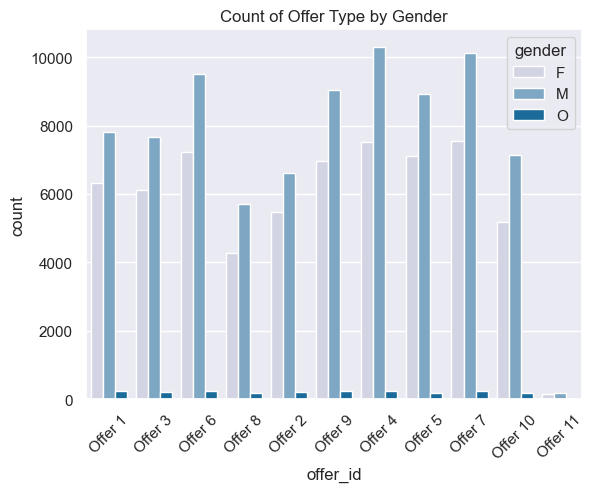

In [86]:
sns.countplot(x='offer_id',hue='gender',data=finalDF,palette='PuBu');
plt.title('Count of Offer Type by Gender')
plt.xticks(rotation=45);

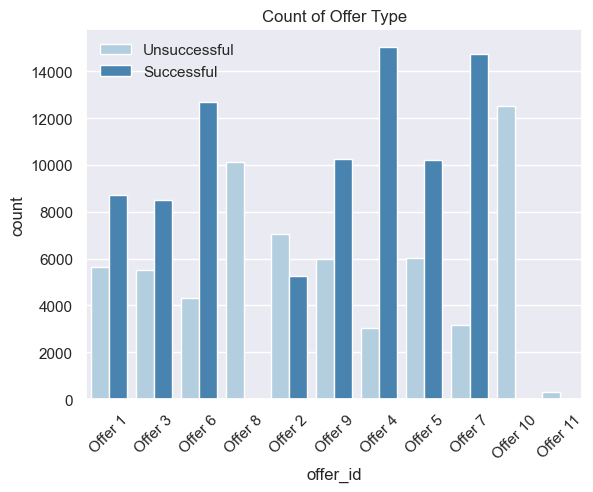

In [87]:
sns.countplot(x='offer_id',hue='successful_offer',data=finalDF,palette='Blues');
plt.legend(['Unsuccessful','Successful'],frameon=False)
plt.title('Count of Offer Type')

plt.xticks(rotation=45);

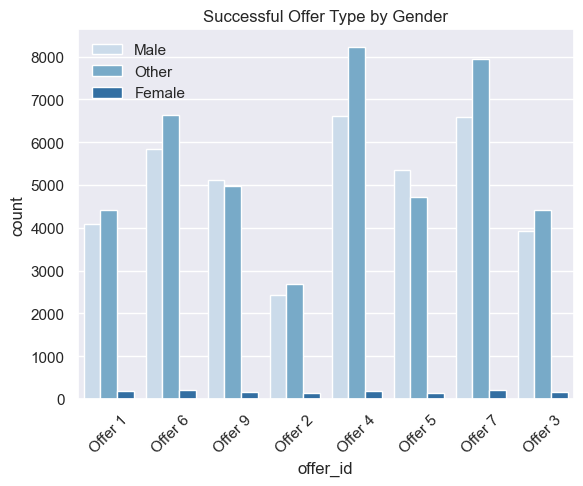

In [88]:
successful = finalDF.loc[finalDF['successful_offer']==1]
sns.countplot(x='offer_id',hue='gender',data=successful,palette='Blues');
plt.legend(['Male','Other','Female'],frameon=False)
plt.title('Successful Offer Type by Gender')

plt.xticks(rotation=45);

In [89]:
finalDF['income_range'].unique()

finalDFC =finalDF.copy()

finalDFC['income_level'] = finalDF['income_range'].astype('category')
finalDFC['age_level'] = finalDF['age_group'].astype('category')
inc_dict = {1:'average',2:'above-average',3:'high'}
finalDFC.replace({"income_level": inc_dict}, inplace=True)
age_dict = {1:'teenager',2:'young-adult',3:'adult',4:'elderly'}
finalDFC.replace({"age_level": age_dict}, inplace=True)

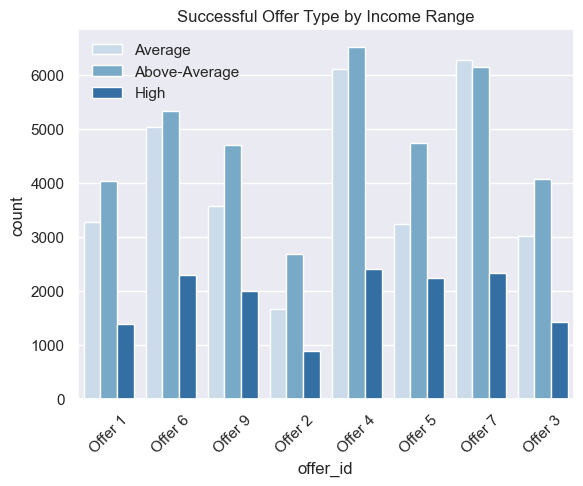

In [90]:
successful = finalDFC.loc[finalDFC['successful_offer']==1]
sns.countplot(x='offer_id',hue='income_level',data=successful,palette='Blues');
plt.legend(['Average','Above-Average','High'],frameon=False)
plt.title('Successful Offer Type by Income Range')

plt.xticks(rotation=45);

In [91]:
finalDFC['age_group'].unique()

[4, 3, 1, 2]
Categories (4, int64): [1 < 2 < 3 < 4]

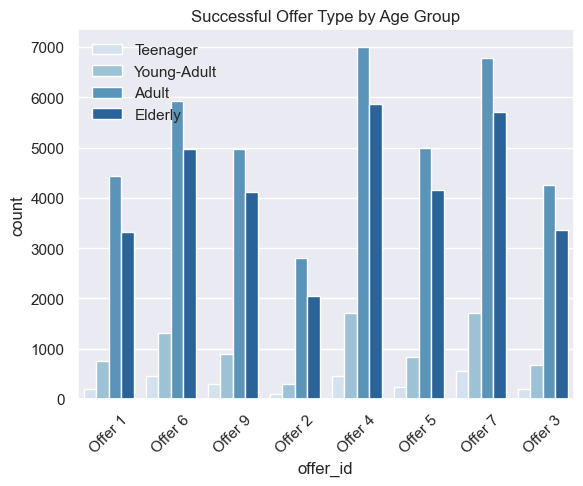

In [92]:
successful = finalDFC.loc[finalDFC['successful_offer']==1]
sns.countplot(x='offer_id',hue='age_level',data=successful,palette='Blues');
plt.legend(['Teenager','Young-Adult','Adult','Elderly'],frameon=False)
plt.title('Successful Offer Type by Age Group')

plt.xticks(rotation=45);

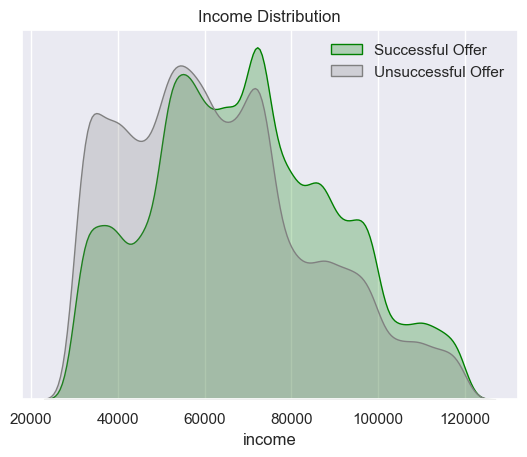

In [93]:
#Distribution of income whether offer was successful
sns.kdeplot(finalDF.loc[finalDF['successful_offer'] == 1]['income'],fill=True,color='green')
sns.kdeplot(finalDF.loc[finalDF['successful_offer'] == 0]['income'],fill=True,color='gray')
plt.title('Income Distribution');
plt.gca().get_yaxis().set_visible(False)
plt.legend(['Successful Offer', 'Unsuccessful Offer'], frameon=False)

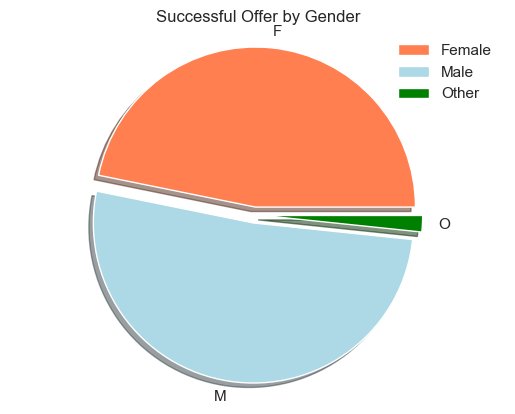

In [94]:
piC = finalDF.groupby(['gender'])['successful_offer'].sum()

plt.pie(piC, labels = piC.index,shadow=True,explode = (0.05,0.05,0.05),colors=['coral','lightblue','green']);
plt.legend(['Female','Male','Other'],frameon=False)
plt.title("Successful Offer by Gender")

plt.gca().axis('Equal');

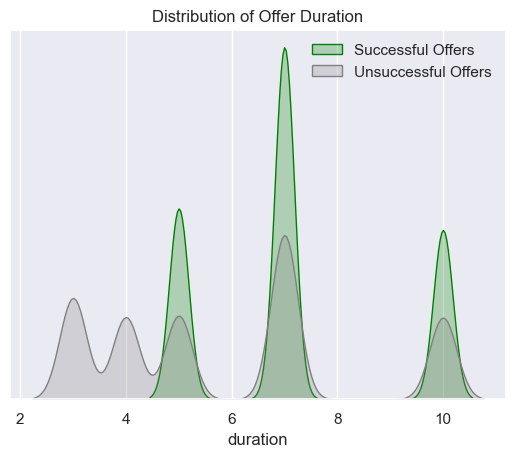

In [95]:
sns.kdeplot(finalDF[finalDF['successful_offer']==1]['duration'],fill=True,color='green');
sns.kdeplot(finalDF[finalDF['successful_offer']==0]['duration'],fill=True,color='grey')
plt.legend(['Successful Offers','Unsuccessful Offers'],frameon=False)
plt.title('Distribution of Offer Duration')
plt.gca().get_yaxis().set_visible(False);

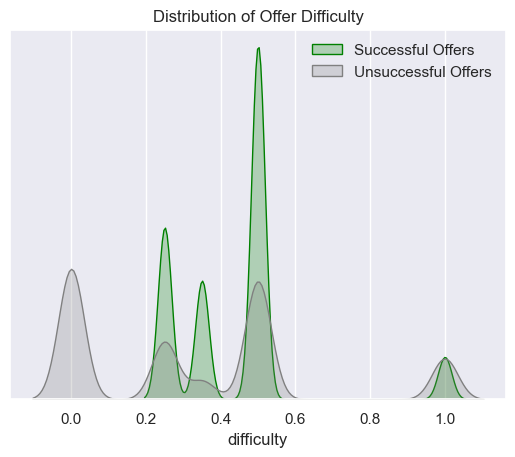

In [96]:
sns.kdeplot(finalDF[finalDF['successful_offer']==1]['difficulty'],fill=True,color='green');
sns.kdeplot(finalDF[finalDF['successful_offer']==0]['difficulty'],fill=True,color='grey');
plt.legend(['Successful Offers','Unsuccessful Offers'],frameon=False)
plt.title('Distribution of Offer Difficulty')
plt.gca().get_yaxis().set_visible(False);

### Separate into Offer records & Discount offers 

In [97]:
#df with only offer records
offer_df = finalDF[finalDF['offer_type_id'].notnull()]

#df with only bogo and discount offer type
offer_disc = finalDF.loc[(finalDF['offer_type_id']==0) | (finalDF['offer_type_id']==3)]

### Question 2 - Based on the demographic data of the customers who gets the highest income range , males or females?

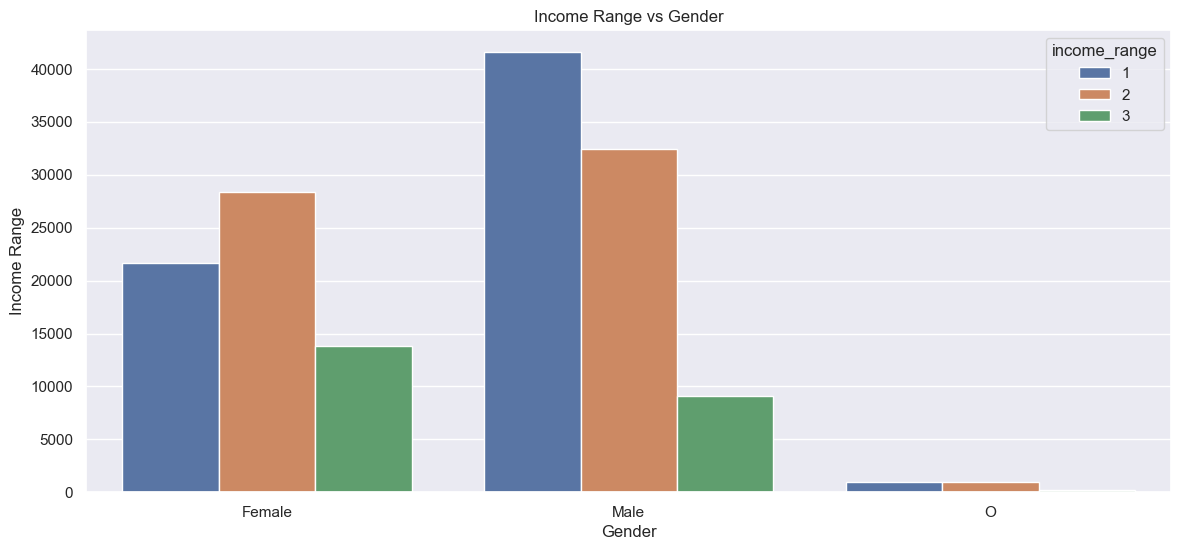

In [98]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="gender", hue="income_range", data= finalDF[finalDF["gender"] != 3])
plt.title('Income Range vs Gender')
plt.ylabel('Income Range')
xlabels = ['Female', 'Male', 'O']
g.set_xticklabels(xlabels)
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

### Findings: Income Distribution is highly skewed by Gender
Customers with High income (Above 90,000) are mostly female customers. Whereas, Average Income(30,000 - 60,000) customers are mostly males.

Text(0.5, 1.0, 'Total counts of 0-BOGO offer vs. 2-discount offer\n')

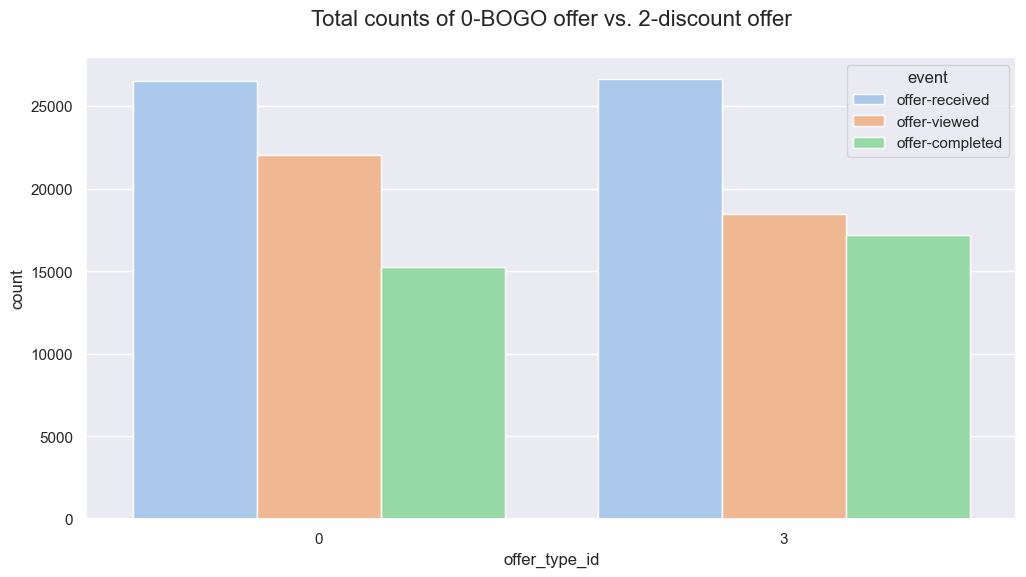

In [99]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="offer_type_id", hue="event", data=offer_disc, palette="pastel")
plt.title("Total counts of 0-BOGO offer vs. 2-discount offer\n", fontsize=16)

### Question 3 - Which one is the most popular offer?

In [100]:
#dataframe with only bogo offer
bogo = offer_disc[offer_disc['offer_type_id']==0]
#dataframe with only discount offer
discount = offer_disc[offer_disc['offer_type_id']==3]

def event_counts(df):
    """
    output:
    returns the counts of each individual event
    
    for example:
    There are 3 different events in this dataset - offer completed/viewed/received.
    The result will return 3 numbers that are the total counts of each of these events.
    """
    events = df['event_id'].unique()
    counts = []
    for event in events:
        count = len(df[df['event_id'] == event])
        yield count
    

In [101]:
#event counts of BOGO offer
bogo0, bogo1, bogo2 = event_counts(bogo)

#event counts of discount offer
discount0, discount1, discount2 = event_counts(discount)

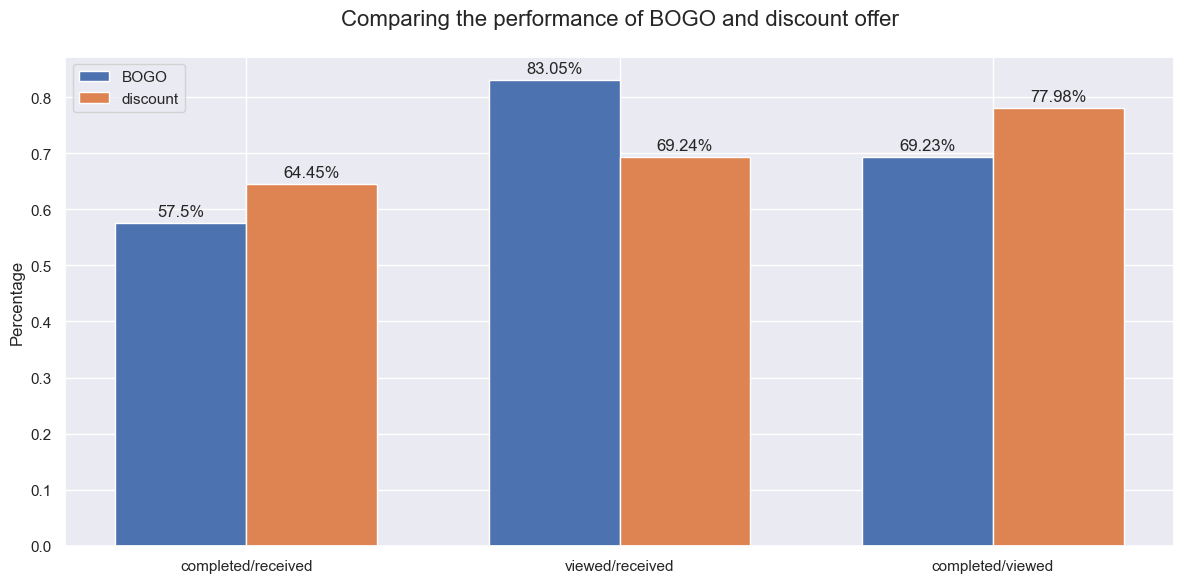

In [102]:
"""
BOGO and discount offers' performances in terms of percentage
"""

labels = ['completed/received', 'viewed/received', 'completed/viewed']
bogo_performance = [bogo2/bogo0, bogo1/bogo0, bogo2/bogo1]
discount_performance = [discount2/discount0, discount1/discount0, discount2/bogo1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, bogo_performance, width, label='BOGO')
rects2 = ax.bar(x + width/2, discount_performance, width, label='discount')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage')
ax.set_title('Comparing the performance of BOGO and discount offer\n', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height*100, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

### Findings: Discount offer seem to be more popular
The absolute number of 'offer completed' is slightly higher for dscount ones than BOGO offer, but also its overall completed/received rate is also about 7% higher. However, BOGO offer has a much greater chance to be viewed or seen by customers after they are recieved.

### Question 4 - What is the common offer each age group ( teenagers, young-adults, adults and elderly)?


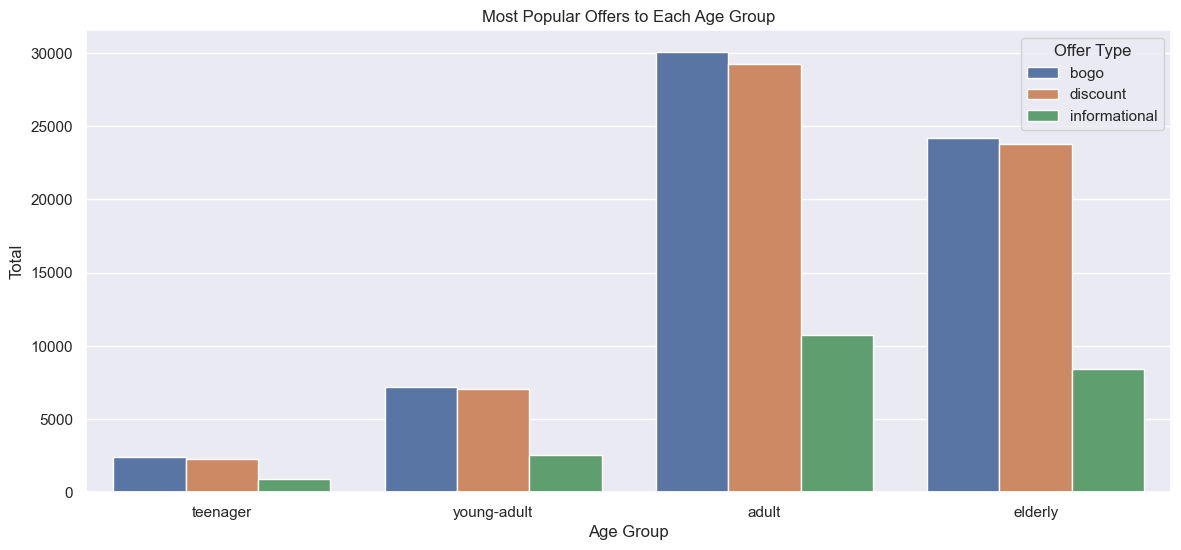

In [103]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x="age_group", hue="offer_type", data=finalDF)
plt.title('Most Popular Offers to Each Age Group')
plt.ylabel('Total')
plt.xlabel('Age Group')
xlabels = ['teenager','young-adult','adult','elderly']
g.set_xticklabels(xlabels)
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

### Findings: Common Offer among all groups

The most common offer type among all age groups is the BOGO , followed by the Discount Offers. Whereas, the least common offer to be sent is the informational offers. I believe that BOGO offers are more attractive compared to other offers provided by Starbucks.



### Question 5 - Who takes longer time to acheive each offer, Males or Females?

Males and Females are pretty close when it comes to the time spent to complete an offer. Both males and females take about 17 days to da so.

In [104]:
tran_avg_len_g_f = finalDF.groupby(['gender', 'offer_id'])['time'].mean().reset_index()
tran_avg_len_g_m = finalDF.groupby(['gender', 'offer_id'])['time'].mean().reset_index()

print(tran_avg_len_g_f[tran_avg_len_g_f['gender'] == 'F']['time'].values[0])#, tran_avg_len_g_f[tran_avg_len_g_f['gender'] == 'F']['time'].values[0] )
print(tran_avg_len_g_m[tran_avg_len_g_m['gender'] == 'M']['time'].values[0])#, tran_avg_len_g_m[tran_avg_len_g_m['gender'] == 'M']['time'].values[0] )

14.992749603803487
15.21456919728588


### Findings: Offer Completion Bias Among Gender

Males and Females are pretty close when it comes to the time spent to complete an offer. Both males and females take about 15 days to complete an offer.

### Question 6 - How many new members Starbucks got each year?



In [105]:
finalDF['membership_year'] = pd.DatetimeIndex(finalDF['became_member_on']).year
finalDF['membership_year'] = finalDF['membership_year'].astype(int)

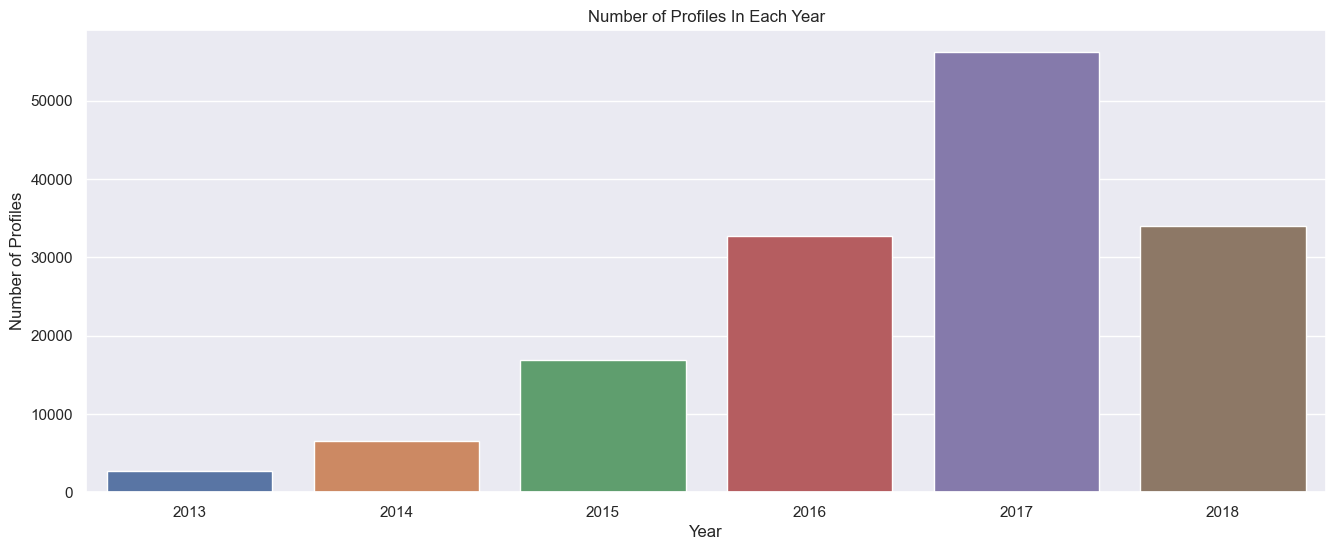

In [106]:
plt.figure(figsize=(16, 6))
sns.countplot(x='membership_year', data = finalDF)
plt.title('Number of Profiles In Each Year')
plt.ylabel('Number of Profiles')
plt.xlabel('Year')
plt.xticks()
plt.show();

In [107]:
# getting the number of customers that became members on 2017
members_2017 = (finalDF['membership_year']==2017).sum()

# getting the total number of members among all the available years
total = finalDF['membership_year'].count()

# getting the percentages of customers that became members on 2017
perc_2017 = round((members_2017/total)*100,2)

print(members_2017)
perc_2017

56202


37.69

### Findings: Best Year for Starbucks in recent times

2017 was the best year for Starbucks in terms of the number of new members. Around 38% of all the customers on our dataset regiseterd as members on this specific year.

### Question 7 - Do different groups of people react differently to offers?



Text(0.5, 1.0, 'Pairplot of 5000 BOGO offer sampels')

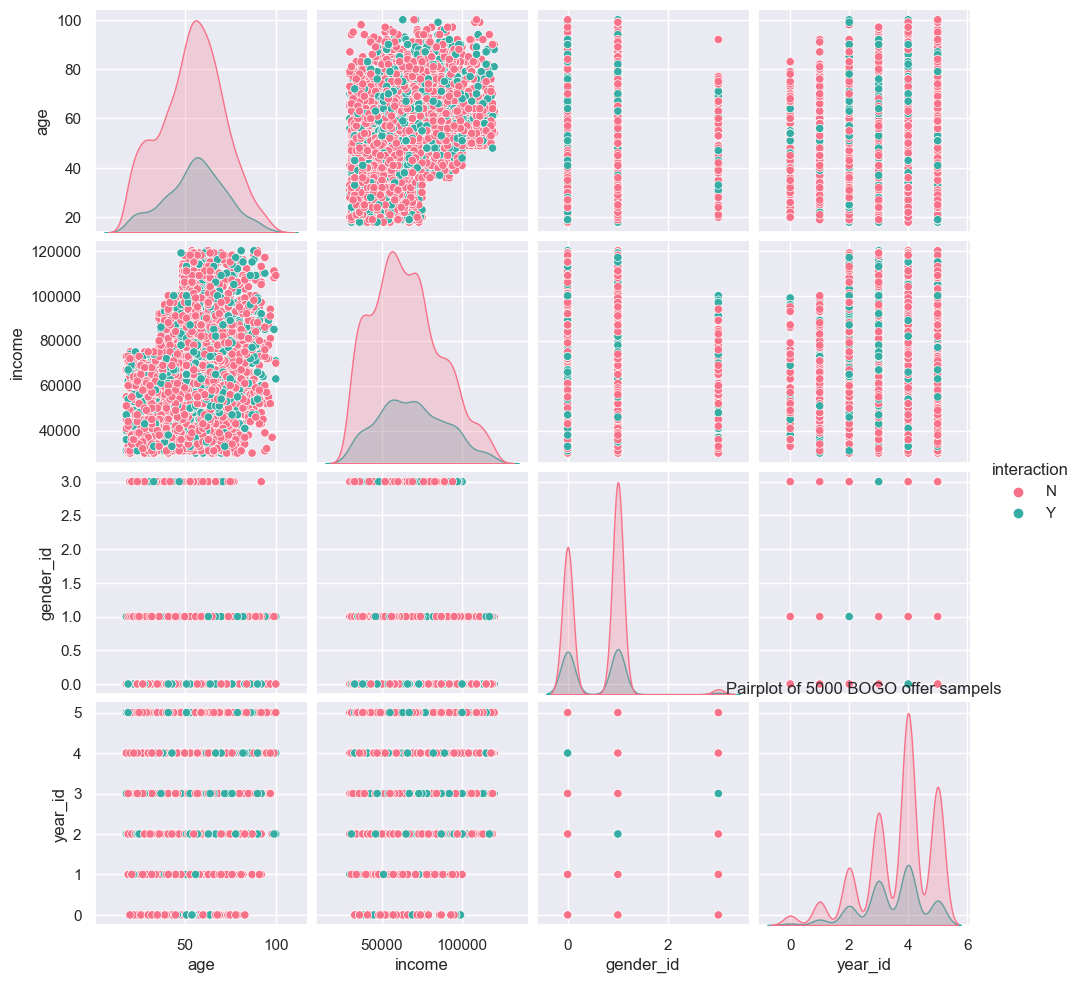

In [108]:
#used 3% of the dataset, otherwise it will take too much time to graph it
df_bogo = bogo.sample(5000).copy()
df_bogo["interaction"] = np.where(df_bogo["event_id"] == 2, "Y", "N")
df_bogo2 = df_bogo[["interaction", "age", "income", "gender_id", "year_id"]]

sns.pairplot(df_bogo2, hue="interaction", palette="husl")
plt.title('Pairplot of 5000 BOGO offer sampels')

Text(0.5, 1.0, 'Pairplot of 5000 discount offer sampels')

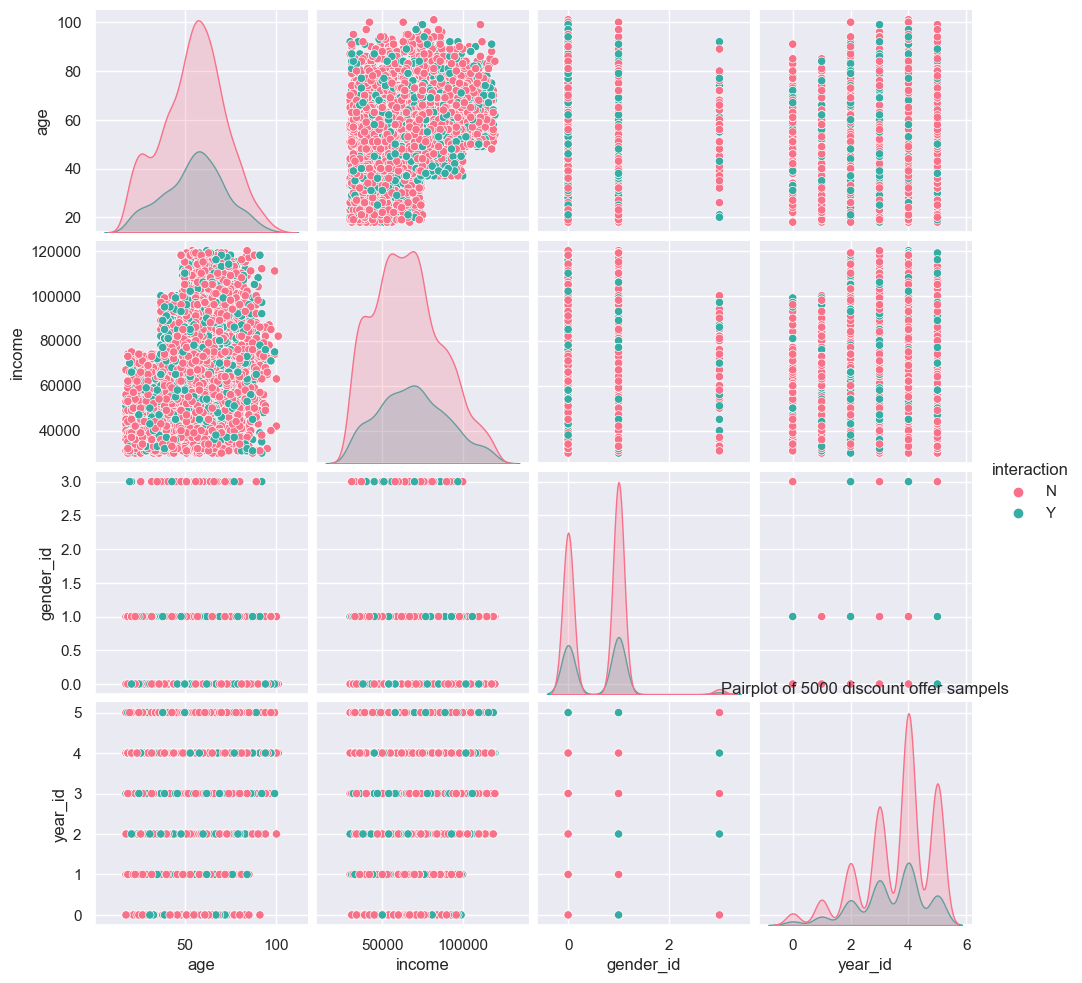

In [109]:
df_discount = discount.sample(5000).copy()
df_discount["interaction"] = np.where(df_discount["event_id"] == 2, "Y", "N")
df_discount2 = df_discount[["interaction", "age", "income", "gender_id", "year_id"]]

sns.pairplot(df_discount2, hue="interaction", palette="husl")
plt.title('Pairplot of 5000 discount offer sampels')

### Findings:  
For both offers, Men have a significantly lower chance of using it. More loyal customers, who have joined for 5-6 years also have a significantly lower chance of using both offers. Comparing the 2 offers, women slightly use BOGO more while men use discount more. 

### Question 8: Do people view and then use the offer? or they use the offer without noticing it?

In [110]:
offer_disc['interacted'] = 1

person_offer = offer_disc.groupby(['customer_id', 'time','event'])['interacted'].max().unstack(fill_value=0)

Text(0, 0.5, 'count')

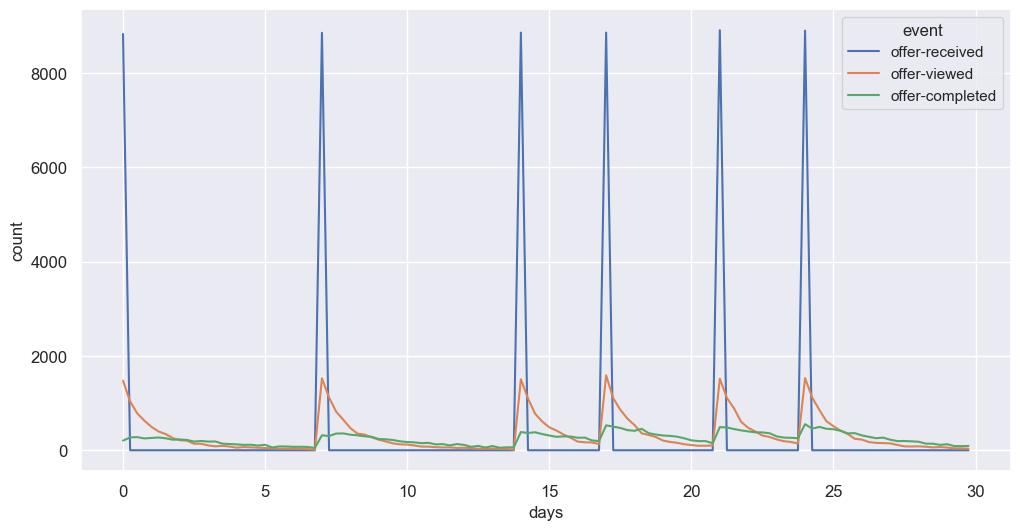

In [111]:
events = list(offer_disc['event'].unique())
ax = person_offer.groupby('time')[events].sum().plot(figsize=(12,6), fontsize=12)
ax.set_xlabel('days')
ax.set_ylabel("count")

### Findings: Offer Trigger Timelines
- Maximum offers get completed just before offer viewed in the first 5 days of experiment time. The adjustment to offer gets a bit better as time goes indicating that majority of the people still used the offer after viewing it. 
- The gap between offer completed and offer viewed also decreased as time goes by.

### Question 9 - Which type of promotions(offers) each gender likes?

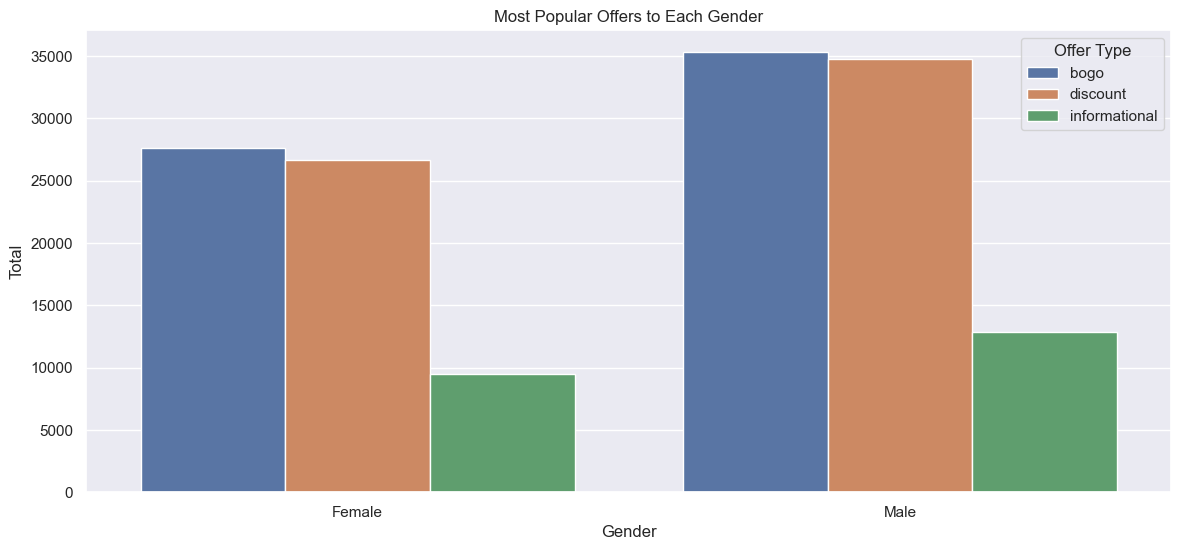

In [112]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="offer_type", data= finalDF[finalDF["gender_id"] != 3])
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male']
g.set_xticklabels(xlabels)
plt.legend(title='Offer Type')
plt.show();

### Findings: Gender Specific Offer Likings
The chart we got showed that both genders like BOGO and Discount offers and they have the same reaction toward Informational offers, they both seem to be not that much interested in it.

----

### Question 10  - From all the offers the customers viewed , how many offers they completed?

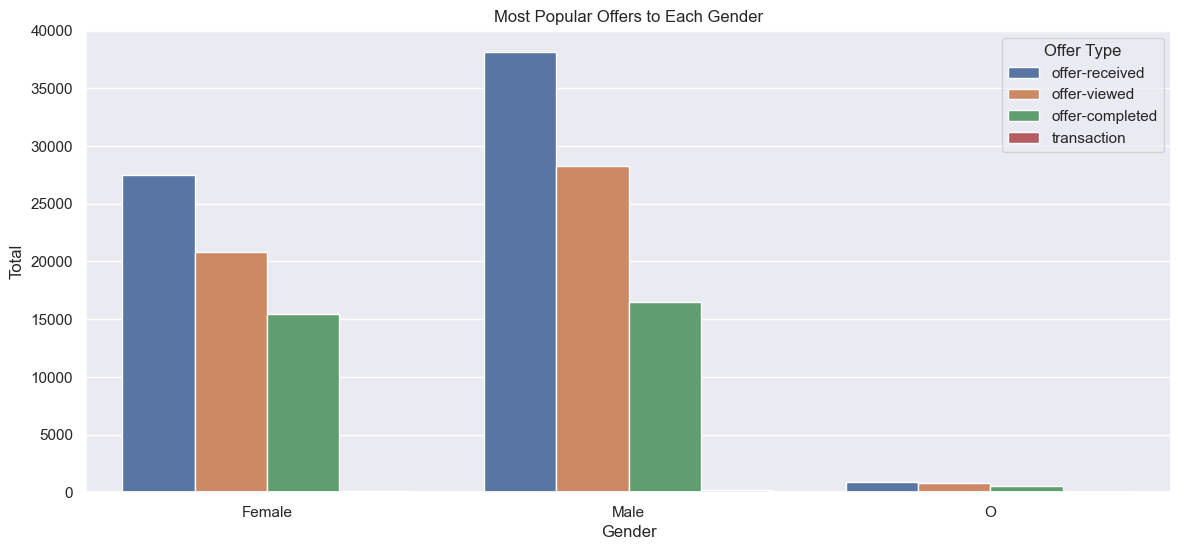

In [113]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='gender', hue="event", data= finalDF[finalDF["gender"] != 3])
plt.title('Most Popular Offers to Each Gender')
plt.ylabel('Total')
plt.xlabel('Gender')
xlabels = ['Female', 'Male', 'O']
g.set_xticklabels(xlabels)
plt.legend(title='Offer Type')
plt.show();

----

In [114]:
total_trans_g_o = finalDF[finalDF["gender"] != 3].groupby(['gender_id','offer_type']).count()
total_trans_g_e = finalDF[finalDF["gender"] != 3].groupby(['gender_id','event']).count()
total_trans_go_o_t = total_trans_g_o.loc[(0)]['event'].sum()
total_trans_go_o_tt = total_trans_g_o.loc[(1)]['event'].sum()
total_trans_go_o_t_offers_f = total_trans_g_o.loc[(0)].loc[['bogo', 'discount', 'informational']]['event'].sum()
total_trans_go_o_t_offers_m = total_trans_g_o.loc[(1)].loc[['bogo', 'discount', 'informational']]['event'].sum()

In [115]:
print('For Females:')
print(f"Number of offer completed: {total_trans_g_e.loc[(0, 'offer-completed')].values[0]}, {round((total_trans_g_e.loc[(0, 'offer-completed')].values[0]/total_trans_g_e.loc[(0, 'offer-viewed')].values[0])*100,2)}% of total offers viewed.")
print(f"Number of offer viewed: {total_trans_g_e.loc[(0, 'offer-viewed')].values[0]}.")
#print("\n")
print('\nFor Males:')
print(f"Number of offer completed: {total_trans_g_e.loc[(1, 'offer-completed')].values[0]}, {round((total_trans_g_e.loc[(1, 'offer-completed')].values[0]/total_trans_g_e.loc[(1, 'offer-viewed')].values[0])*100,2)}% of total offers viewed.")
print(f"Number of offer viewed: {total_trans_g_e.loc[(1, 'offer-viewed')].values[0]}.")

For Females:
Number of offer completed: 15477, 74.46% of total offers viewed.
Number of offer viewed: 20786.

For Males:
Number of offer completed: 16466, 58.18% of total offers viewed.
Number of offer viewed: 28301.


### Findings: Gender Specific Offer Completions

Females completed around 75% of the offers they viewed, it is 16% more than males who just completed 58% of the offers they viewed. 

### Question 11  - Which group of people are probable to use the offer/make a purchase without viewing the offer?

In [116]:
#select the first 2 interactions a person had with an offer
disc_top2 = offer_disc.sort_values('time').groupby(['customer_id', 'offer_id']).tail(2)
disc_top2.head()

,customer_id,event,time,offer_id,amount,offer-completed,offer-received,offer-viewed,transaction,reward,...,income_range,year,days,gender_id,event_id,offer_type_id,year_id,channelTye_id,successful_offer,interacted
20494,1c0392ee64b3495abdebc3d6002f027c,offer-received,0.0,Offer 9,0.0,0,1,0,0,1.0,...,1,2016,0,0,0,0,3,1,0.0,1
20493,469531c522214f68af000a09a8056fe9,offer-viewed,0.0,Offer 5,0.0,0,0,1,0,1.0,...,1,2017,0,1,1,0,4,3,0.0,1
20492,469531c522214f68af000a09a8056fe9,offer-received,0.0,Offer 5,0.0,0,1,0,0,1.0,...,1,2017,0,1,0,0,4,3,0.0,1
20481,bc9bab272ac24358b56a422e437553f4,offer-received,0.0,Offer 2,0.0,0,1,0,0,0.5,...,2,2017,0,0,0,3,4,0,0.0,1
8629,9535686d9d8c419583978b41f993151d,offer-received,0.0,Offer 5,0.0,0,1,0,0,1.0,...,1,2017,0,1,0,0,4,3,0.0,1


In [117]:
'''
#dataset with users first interaction
first_event= disc_top2.sort_values('time').groupby(['customer_id', 'offer_id']).min()
first_event.to_pickle("./firstEvent.pkl")
'''

'\n#dataset with users first interaction\nfirst_event= disc_top2.sort_values(\'time\').groupby([\'customer_id\', \'offer_id\']).min()\nfirst_event.to_pickle("./firstEvent.pkl")\n'

In [118]:
'''
#dataset with users second interaction
second_event= disc_top2.sort_values('time').groupby(['customer_id', 'offer_id']).max()
second_event.to_pickle("./secondEvent.pkl")
'''

'\n#dataset with users second interaction\nsecond_event= disc_top2.sort_values(\'time\').groupby([\'customer_id\', \'offer_id\']).max()\nsecond_event.to_pickle("./secondEvent.pkl")\n'

In [119]:
first_event = pd.read_pickle("./firstEvent.pkl")
second_event= pd.read_pickle("./secondEvent.pkl")

In [120]:
#we only want to examine the users who received an offer and compelted it without viewing
event1 = first_event[first_event['event']=='offer-received']
event2 = second_event[second_event['event']=='offer-completed']

#a list of [person, offer id] whose first intereaction with the offer was 'offer received'
lst1 = []

#a list of [person, offer id] whose second intereaction with the offer was 'offer completed'
lst2 = [] 

for x in range(len(event1)):
    person = event1.index[x]
    lst1.append(person)

for y in range(len(event2)):
    person = event2.index[y]
    lst2.append(person)

print(lst1[0], lst2[0])

('0020c2b971eb4e9188eac86d93036a77', 'Offer 9') ('01925607d99c460996c281f17cdbb9e2', 'Offer 5')


In [121]:
#take out only the person ids
person1 = [lst1[x][0] for x in range(len(lst1))]
person2 = [lst2[x][0] for x in range(len(lst2))]

#found the people that exist in both lists
c = Counter(person1) & Counter(person2)
#a list of people whom completed an offer without viewing it
person_list = list(c.keys())
profile

,gender,age,customer_id,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range
0,None,NaN,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,0,0,0,NaN,NaN
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,0,0,3,3
2,None,NaN,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,0,0,0,NaN,NaN
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0,4,3
4,None,NaN,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16995,F,45.0,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,1,0,0,3,1
16996,M,61.0,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,0,1,0,4,2
16997,M,49.0,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,0,1,0,3,2
16998,F,83.0,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,1,0,0,4,1


In [122]:
#we want to study these people. Therefore, we label them in the profile dataset
profile['strange'] = np.where(profile.customer_id.isin(person_list), 'yes', 'no')

profile.sample(5)

,gender,age,customer_id,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range,strange
515,M,47.0,ec5800ee8ae040708487b6473b1fbefc,2018-02-11,77000.0,0,1,0,3,2,no
7202,F,55.0,ce11bb1927374fb6a0b54ecda9275b54,2018-02-07,75000.0,1,0,0,3,2,no
2330,M,38.0,327eb6591ffc43ef8bbc550d878891ce,2016-02-24,67000.0,0,1,0,3,2,no
5065,M,32.0,c4875ed3bb9e4823bdd7ab5171326dbb,2017-09-06,35000.0,0,1,0,2,1,no
14956,F,79.0,5feffcc783814110a640ad40ccea3af4,2018-04-27,46000.0,1,0,0,4,1,no


In [123]:
def clean_profile(df):
    clean_df = df[df['gender'].notnull()].copy() #drop null values
    
    #change became_member_on to datetime formate
    clean_df['became_member_on'] = pd.to_datetime(clean_df['became_member_on'], format='%Y%m%d')
    # create a new column that has the year which customers become members
    clean_df['year'] = clean_df['became_member_on'].apply(lambda x: str(x)[:4])

    return clean_df
    

clean_profile = clean_profile(profile)
clean_profile.head()

,gender,age,customer_id,became_member_on,income,gender-F,gender-M,gender-O,age_group,income_range,strange,year
1,F,55.0,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,1,0,0,3,3,no,2017
3,F,75.0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,1,0,0,4,3,no,2017
5,M,68.0,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,0,1,0,4,2,no,2018
8,M,65.0,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,0,1,0,4,1,no,2018
12,M,58.0,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,0,1,0,3,1,no,2017


In [124]:
def boxplots(df, variables, hue, n_rows=None, n_cols=None):
    '''Draw boxplots to examine the churn behavior of each continuous variable. 

    Args:
    variables: list. A list of variables that you would like to examine
    n_rows, n_cols: int. 
    hue: Because the context here is a churn analysis, so I set the default to "Churn". 
    
    Returns:
    boxplots of all the variables that were passed in the format of that you specify. 
    '''
    fig=plt.figure(figsize=(12,6))
    sns.set(palette='pastel')
    for i, var in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        sns.boxplot(y=var, x=hue, hue=hue, data=df, ax=ax).set_title(var)
    plt.show()

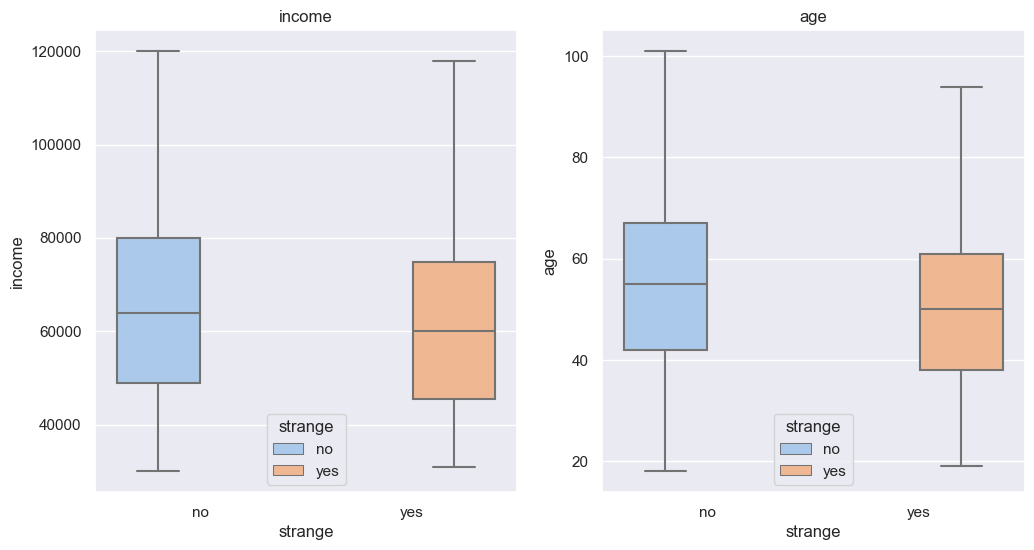

In [125]:
var=['income', 'age']
boxplots(df=clean_profile, variables=var, hue="strange", n_rows=1, n_cols=2,)

In [126]:
problem_df = clean_profile[clean_profile['strange']=='yes']
no_problem = clean_profile[clean_profile['strange']=='no']

Text(0, 1.0, 'Comparing the propotion of joining year b/w the strange profiles with the rest\n')

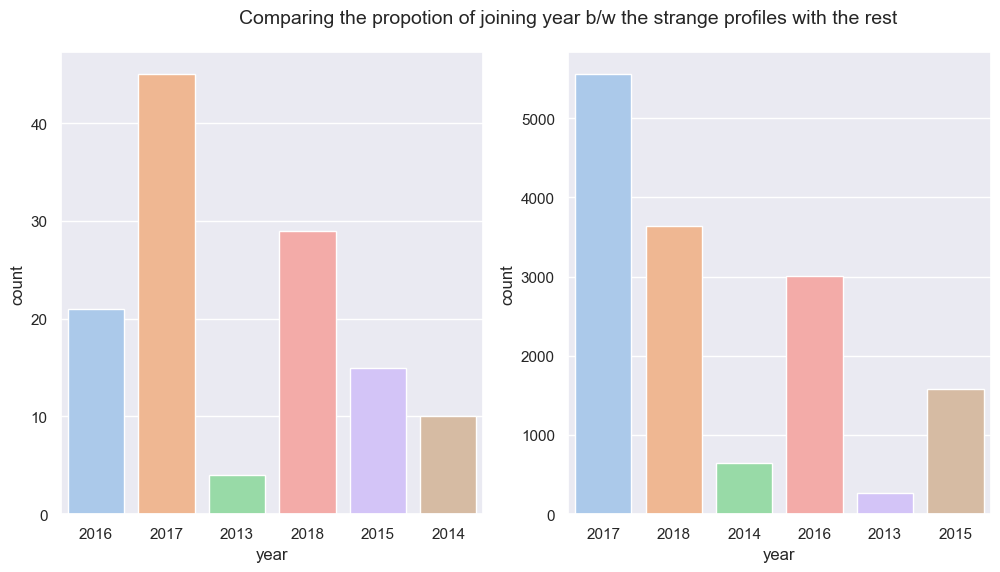

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(x="year", data=problem_df, palette="pastel", ax=ax[0])
sns.countplot(x="year", data=no_problem, palette="pastel", ax=ax[1])
plt.title("""Comparing the propotion of joining year b/w the strange profiles with the rest\n""", x=0, fontsize=14)

Text(0, 1.0, 'Comparing the proportion of genders b/w the strange profiles with the rest\n')

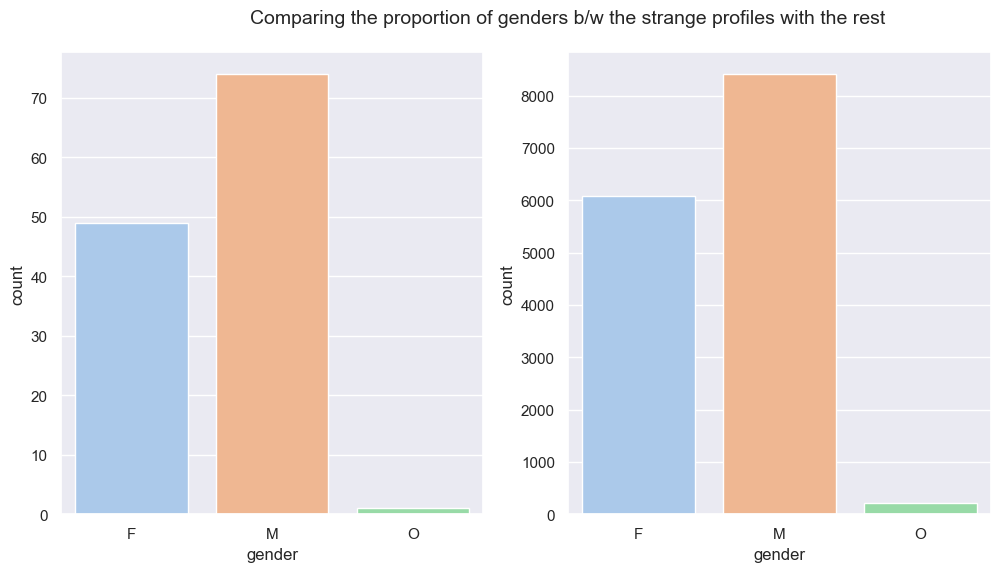

In [128]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(x="gender", data=problem_df, palette="pastel", ax=ax[0])
sns.countplot(x="gender", data=no_problem, palette="pastel", ax=ax[1])
plt.title("Comparing the proportion of genders b/w the strange profiles with the rest\n", x=0, fontsize=14)

### Findings: Differences Between Customers who use offer without viewing and who don't

Comparing the demographics between customers who used our offers before viewing it and the rest of the customers, there's no significant difference. This indicates that all customers are equally likely to use our offers accidentally.

### Question 12 - Which type of offer is easier to be used without even noticed by the user?

In [129]:
#offer ids of the first user-offer interactions that were 'offer received'
offer1 = [lst1[x][1] for x in range(len(lst1))]

#offer ids of the second user-offer interactions that were 'offer completed'
offer2 = [lst2[x][1] for x in range(len(lst2))]

#find the common offer ids and count how many times they appeared
offer_count = Counter(offer1) & Counter(offer2)

In [130]:
def counter2df(counter):
    #turn the counter object to dataframe
    df = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    #rename the columns
    df.rename(columns={'index':'offer_id', 0:'count'},inplace=True)
    
    cols = ['reward', 'channels', 'difficulty', 'duration','offer_type', 'offer_id']
    
    mergdf = finalDF[cols]
    
    #merge it with the merged dataframe so that we can what these offers are
    newdf = mergdf.merge(df, left_on='offer_id', right_on='offer_id', how='inner')
    #sort the offers
    newdf.sort_values(by='count', ascending=False, inplace=True)
    return newdf

In [131]:
problemOffers_df = counter2df(offer_count)
cdf = problemOffers_df.copy()
cdf = cdf[~cdf.astype(str).duplicated(keep='last')]

In [132]:
all0_3_offers = offer_disc[offer_disc['event']=='offer-received']
all_offer_count = Counter(all0_3_offers['offer_id'])
allOffers_df = counter2df(all_offer_count)
adf = allOffers_df.copy()
adf = adf[~adf.astype(str).duplicated(keep='last')]
all_offerdf_labels = [x[-3:] for x in adf['offer_id']]
problem_offerdf_labels = [x[-3:] for x in cdf['offer_id']]

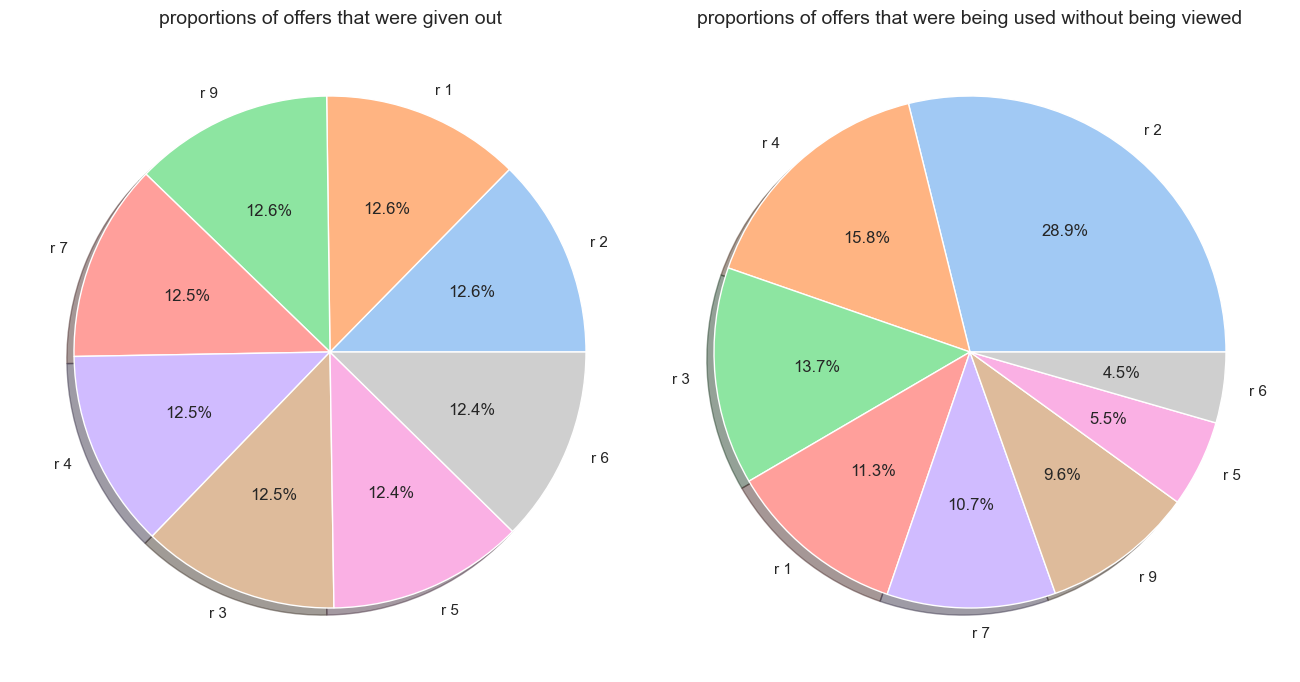

In [133]:
fig = plt.figure()

ax1 = fig.add_axes([0, 0, 1, 2], aspect=1)
ax1.pie(adf['count'], labels=all_offerdf_labels, autopct='%1.1f%%', shadow=True)
plt.title('proportions of offers that were given out', fontsize=14)

ax2 = fig.add_axes([1, .0, 1, 2], aspect=1)
ax2.pie(cdf['count'], labels=problem_offerdf_labels, autopct='%1.1f%%', shadow=True)
plt.title('proportions of offers that were being used without being viewed', fontsize=14)
plt.show()

### Findings: The design of the offer plays a big role, especially the promotion channels and duration.
- If an offer is being promoted through web and email, then it has a much greater chance of not being seen
- Being used wihout viewing to link to the duration of the offers. Longer duration increase the chance
- discount offer type also has a greater chance to be used without seeing compare to bogo

<a id="7"></a>
# 7.Model Building 

# Metrics & Feature Selection

Now we have performed some exploratory analysis on the datasets we can now try a few different machine learning models to try and predict which offer would be best suited for each customer.


In order to evaluate our model's performance, we will use accuracy. This Metric was chosen for the following reasons :
* We have a simple binary classification problem, i.e. either offer was succesful or not succesful: 
 
 The offer can be succesful in couple of ways: 
 
  * offer viewed and completed 
  * offer recieved and completed 

* It enables us to recognize how well our model is predicting by comparing the number of correct predictions with the total number of predictions ( the concept of accuracy).

### Feature Selection


We need to split data into features and target labels, considering ONLY those features that we believe are important and wimpler for the project to work on for our model to predict accurately.


Those features are as follows:

- reward
- customer_id
- offer_id
- amount
- duration
- difficulty
- email
- social
- mobile
- web
- offer_type
- age
- gender-F
- gender-M
- gender-O
- offer_type-bogo
- offer_type-discount
- offer_type-informational
- became_member_on
- income

Our target is:

* 'successful_offer' that will be either:
  * 1 : offer completed
  * 0 : offer not completed

### Imputation, Scaling & Normalization

In [134]:
cols = ['customer_id', 'offer_id', 'successful_offer', 'reward', 'difficulty',
       'duration', 'email', 'mobile', 'social', 'web', 'offer_type-bogo',
       'offer_type-discount', 'offer_type-informational', 'gender', 'age',
       'became_member_on', 'income', 'gender-F', 'gender-M', 'gender-O']
finML = finalML[cols]
finML['became_member_on'] = pd.DatetimeIndex(finML['became_member_on']).year
finML.head()

,customer_id,offer_id,successful_offer,reward,difficulty,duration,email,mobile,social,web,offer_type-bogo,offer_type-discount,offer_type-informational,gender,age,became_member_on,income,gender-F,gender-M,gender-O
0,0009655768c64bdeb2e877511632db8f,Offer 1,0.0,0.2,0.50,7,1,1,0,1,0,1,0,M,33.0,2017,72000.0,0,1,0
1,0009655768c64bdeb2e877511632db8f,Offer 2,0.0,0.0,0.00,4,1,1,0,1,0,0,1,M,33.0,2017,72000.0,0,1,0
2,0009655768c64bdeb2e877511632db8f,Offer 3,0.0,0.0,0.00,3,1,1,1,0,0,0,1,M,33.0,2017,72000.0,0,1,0
3,0009655768c64bdeb2e877511632db8f,Offer 4,1.0,0.5,0.25,5,1,1,1,1,1,0,0,M,33.0,2017,72000.0,0,1,0
4,0009655768c64bdeb2e877511632db8f,Offer 5,1.0,0.2,0.50,10,1,1,1,1,0,1,0,M,33.0,2017,72000.0,0,1,0


In [135]:
def clean_overall_df_ML(overall_dfS):
    '''
    Function to clean overall_df to return X variables and the predictor Y
    
    Input - overall_df
    
    output - two dataframes X and Y
    
    X - Will be all the variables we will be using to predict the best offer type.
    
    Y - Will be the offer type.
    
    '''
    
    #We want to look at only successful offers
    
    clean_df_ = overall_dfS.loc[overall_dfS['successful_offer'] == 1]
    
   ##### clean_df_['mem_days'] = datetime.datetime.today().date() - clean_df_['became_member_on'].dt.date

    clean_df_.drop('gender',axis=1,inplace = True)
    
    #We have missing values in income and age - fill these with the means for that column.
    
    for col in ['age','income']:
        
        clean_df_[col] = clean_df_[col].fillna(clean_df_[col].mean())

    
    X = clean_df_.iloc[:,3:]
    
    
    Y= clean_df_.iloc[:,1]
    
    return X, Y

X,Y = clean_overall_df_ML(finML)

In [136]:
finML.head()

,customer_id,offer_id,successful_offer,reward,difficulty,duration,email,mobile,social,web,offer_type-bogo,offer_type-discount,offer_type-informational,gender,age,became_member_on,income,gender-F,gender-M,gender-O
0,0009655768c64bdeb2e877511632db8f,Offer 1,0.0,0.2,0.50,7,1,1,0,1,0,1,0,M,33.0,2017,72000.0,0,1,0
1,0009655768c64bdeb2e877511632db8f,Offer 2,0.0,0.0,0.00,4,1,1,0,1,0,0,1,M,33.0,2017,72000.0,0,1,0
2,0009655768c64bdeb2e877511632db8f,Offer 3,0.0,0.0,0.00,3,1,1,1,0,0,0,1,M,33.0,2017,72000.0,0,1,0
3,0009655768c64bdeb2e877511632db8f,Offer 4,1.0,0.5,0.25,5,1,1,1,1,1,0,0,M,33.0,2017,72000.0,0,1,0
4,0009655768c64bdeb2e877511632db8f,Offer 5,1.0,0.2,0.50,10,1,1,1,1,0,1,0,M,33.0,2017,72000.0,0,1,0


In [137]:
#finML.isnull().sum()
#X.isnull().sum()

### 1. Random Forest Classifier On Imbalanced dataset

We will use an Random Forrest Classifier to try and classify and will try to figure out how we can predict the feature dependence on making an offer complete. 

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.25,random_state=21)
X_train.shape,X_test.shape

((18345, 16), (6115, 16))

In [139]:
#Feature scaling
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [140]:
clf = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=42)

clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [141]:
y_pred = clf.predict(X_test)

print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy: 1.0000


In [142]:
confusion = confusion_matrix(y_test,y_pred)

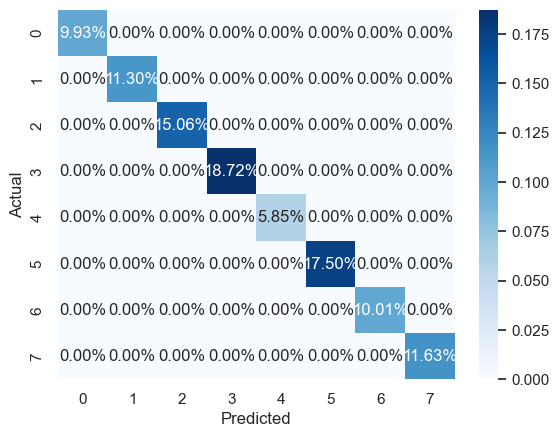

In [143]:
#sns.heatmap(confusion,annot=True);
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [144]:
X,Y = clean_overall_df_ML(finML)

#Only keep inforamtion in the X dataframe that refers to the user.
X = X.iloc[:,10:]
X.head()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.2,random_state=21)

#Feature Scaling

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Instansiate Classifier
clf = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=42)


#Train Classifier
clf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [145]:
y_pred = clf.predict(X_test)

print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy: 0.0801


As mentioned in the Metric Section above, in order to evaluate our models performance , we will use accuracy. This Metric was chosen for the following reasons :

* since we have a simple classiifcation problem, i.e. either : offer viewed or offer completed.
* It enables us to recognize HOW WELL our model is predicting by comparing the number of correct predictions witht the total number of predictions ( the concept of accuracy).

In [146]:
confusion = confusion_matrix(y_test,y_pred)

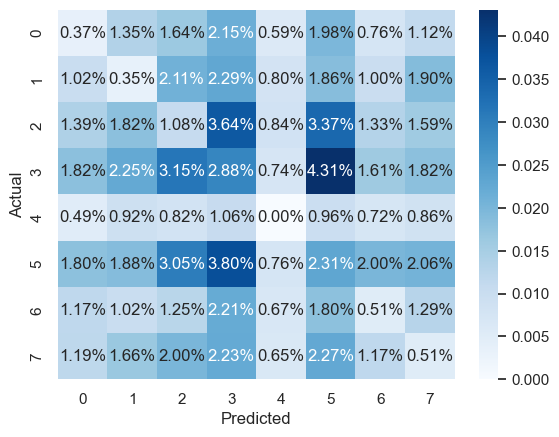

In [147]:
#sns.heatmap(confusion,annot=True);
sns.heatmap(confusion/np.sum(confusion), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual");

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Offer 1       0.04      0.04      0.04       487
    Offer 10       0.03      0.03      0.03       554
     Offer 4       0.07      0.07      0.07       737
     Offer 5       0.14      0.16      0.15       909
     Offer 6       0.00      0.00      0.00       285
     Offer 7       0.12      0.13      0.13       864
     Offer 8       0.06      0.05      0.05       485
     Offer 9       0.05      0.04      0.04       571

    accuracy                           0.08      4892
   macro avg       0.06      0.07      0.06      4892
weighted avg       0.08      0.08      0.08      4892



### Findings: Intepretation from the RF Model on Imbalanced dataset

The RF classifier has very low accuracy of 8% and it classifies the offer recieved class with a higher accuracy than the other classes. The main reason for this low accuracy what we found out is because of imbalanced classes and we convert in the following section to generate a balanced classification problem.At the end we will see how RF compares after we have balanced our classes. 

### 2. Logistic Regression & Hyperparameter Tuning

Here we are now going to predict whether a user will complete an offer based on variables from the user and on the offer.

We will be using Logistic Regression, SVM, LDA and Adaboost to try and predict whether a customer receiving an offer will be successful.

To evaluate these models we will be using the model accuracy, the f1 score and the AUC rating. As we care equally about how the model classifies both classes we will place more of a preference on the accuracy. However, if we cared more about incorrectly classified predictions we need to focus on the f1 score. To visualize the performance of the models we will use Confusion matrixs and AUC curves.

<AxesSubplot: xlabel='successful_offer', ylabel='count'>

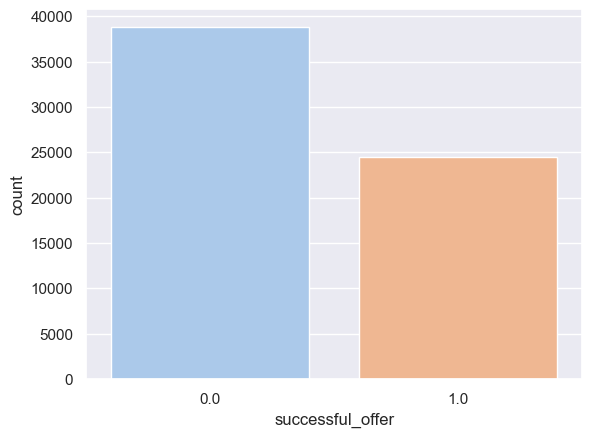

In [149]:
sns.countplot(x ='successful_offer', data = finML)

In [150]:
df_class1 = finML.loc[finML['successful_offer']==1]

count_class0,count_class1 = finML['successful_offer'].value_counts()

In [151]:
df_class1_over = df_class1.sample(count_class0,replace=True)

df_class_0 = finML.loc[finML['successful_offer'] == 0]

over_df = pd.concat([df_class1_over,df_class_0],axis=0)

# over_df now has balanced classifying classes
over_df.drop('gender',axis=1,inplace=True)

### Data Preparation

Now the classes are balanced we now need to impute missing values. There are missing values in the agea and income columns. From our previous analysis there is a slight right skew in their distributions so i will inpute the missing values with the median for their respective columns.

During the initial cleaning i have already encoded the catergorical variables like gender etc.

A key assumption for Logistic Regression is that there is little or no multicolinearlity between independent variables.

In regards to outliers from my research i have read that Logistic Regression is robust in regards to outliers due to an inverse logistic loss function.

To process the data we will use MinMaxScaler.



In [152]:
over_df.isnull().sum()

#Impute missing values with median value for the column. I have chosen the median because both age and income have
#a right skew in their distributions.
for col in ['age','income']:
    over_df[col] = over_df[col].fillna(over_df[col].median())

<AxesSubplot: xlabel='successful_offer', ylabel='count'>

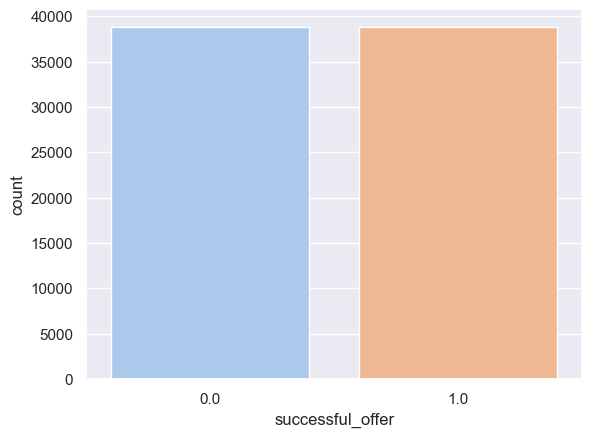

In [153]:
sns.countplot(x ='successful_offer', data = over_df)

In [154]:
over_df.isnull().sum()

#Impute missing values with median value for the column. I have chosen the median because both age and income have
#a right skew in their distributions.
for col in ['age','income']:
    over_df[col] = over_df[col].fillna(over_df[col].median())

We have now rebalanced the classes via over sampling and we can now proceed to implement a classifier. But first i need to handle the offer id as it still categorical.

In [254]:
X = over_df.iloc[:,3:]
y = over_df.iloc[:,2]

X = pd.concat([X, over_df['offer_id']],axis=1)

def encode_offer_id(X):
    
    '''
    Fuction to encode offer id into dummy columns.
    
    Input - X dataframe with offer_id column present
    
    Output - X dataframe with encoded columns for offer id
    
    '''
    
    dummies = pd.get_dummies(X['offer_id'])
    
    new = pd.concat([X.drop('offer_id',axis=1), dummies],axis=1)
    
    
    return new

X = encode_offer_id(X)

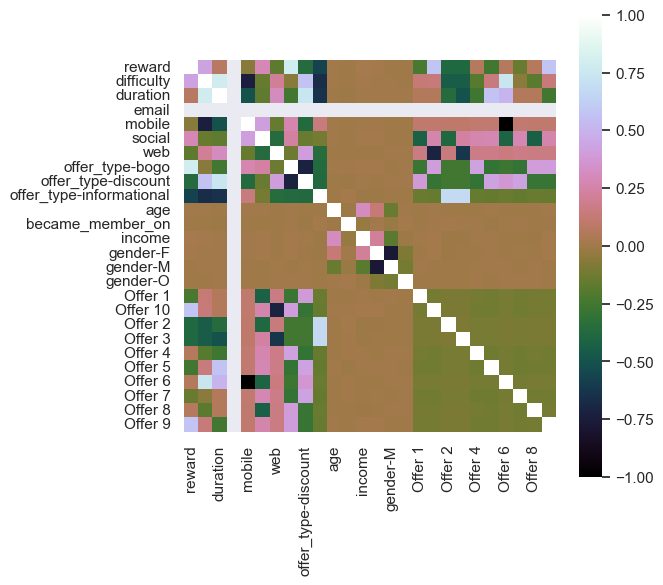

In [255]:
plt.figure(figsize=(6,6))
sns.heatmap(X.corr(),square=True, cmap='cubehelix');

As Logistic Regression assumes little or no multicolinearity we are going to drop the email feature as it appears to be strongly correlated with every feature.

In [256]:
X = X.drop(['email'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state = 42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)


In [264]:
model = LogisticRegression(solver='liblinear',random_state=42)

In [265]:
model.fit(X_train,y_train)

log_pred = model.predict(X_test)

log_accuracy = accuracy_score(y_test,log_pred)

print("Logistic Regression Accuracy: %.2f" % accuracy_score(y_test, log_pred))

Logistic Regression Accuracy: 0.76


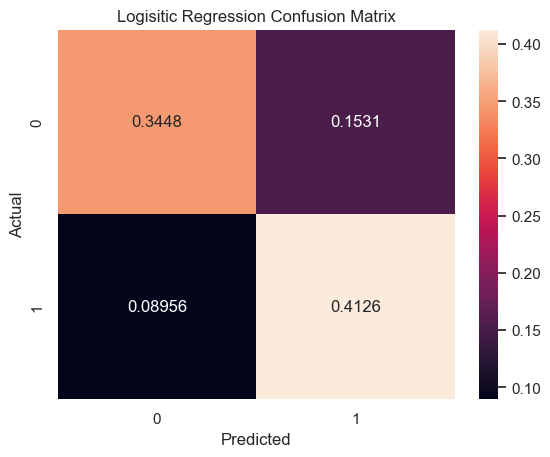

In [266]:
logconf = confusion_matrix(y_test,log_pred)

sns.heatmap(logconf/np.sum(logconf),annot=True,fmt='.4')
plt.title('Logisitic Regression Confusion Matrix')
plt.ylabel("Actual")
plt.xlabel("Predicted");

In [267]:
log_f1_score = f1_score(y_test,log_pred)

print('Logisitic Regression F1 Score: %.3f' % log_f1_score)

Logisitic Regression F1 Score: 0.773


The logistic regression classifier gave an accuracy of 76% and we achieved an f1 score of 0.773. As this is a binary classifcation where we will place more weight on the f1 score as the f1 score is the weighted harmonic mean of recall and precision.

We have just used the standard parameters and now will now look at tuning the parameters with GridSeacrchCV

In [268]:
parameters = {'penalty': ['l1','l2'], 'C': [1,10,100,1000]}

grid_log = GridSearchCV(LogisticRegression(), parameters, verbose=3, n_jobs=-1,cv=3)

In [269]:
grid_log.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             verbose=3)

In [270]:
grid_log.best_params_

{'C': 100, 'penalty': 'l2'}

In [271]:
log2_pred = grid_log.predict(X_test)

In [272]:
log2_accuracy = accuracy_score(y_test,log2_pred)
log2_f1 = f1_score(y_test,log2_pred)

In [273]:
print('Tuned Logistic Regression accuracy: %.3f' % log2_accuracy)
print('Tuned Logistic Regression F1 score: %.3f' % log2_f1)

Tuned Logistic Regression accuracy: 0.757
Tuned Logistic Regression F1 score: 0.773


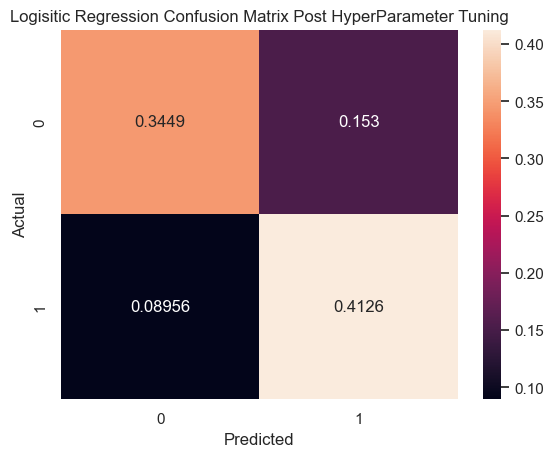

In [276]:
logconf2 = confusion_matrix(y_test,log2_pred)

sns.heatmap(logconf2/np.sum(logconf2),annot=True,fmt='.4')
plt.title('Logisitic Regression Confusion Matrix Post HyperParameter Tuning')
plt.ylabel("Actual")
plt.xlabel("Predicted");

Our original Logistic Regresion model achieved the exact same f1 score but achieved a slightly higher accuracy. So using GridSearch hypertuning our model did not improve.

Typically Logistic Regression requires large samples sizes for accurate results.

### 3. Support Vector Machines

For SVM we need to further process the data. Its important that the data is scaled to avoid difficulties in the kernel calculation. 

SVM's are great for non linear classification problems.

As using GridSearch will take too long using SVM we will change the kernel and the regularization parameter C to try and optimize the classifier instead of automation pipeline for this project.

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=.2)

#Feature scaling
scaler = StandardScaler()

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

To begin with we will use the Linear kernel and the default parameter for C, which is 1.

In [169]:
svc = SVC(kernel='linear',cache_size=6000)

#Train model
svc.fit(X_train,y_train)

#Predict values from test dataset
svc_y_pred = svc.predict(X_test)

#Evaluate accuracy and f1 score
svc_accuracy = accuracy_score(y_test,svc_y_pred)
svc_f1 = f1_score(y_test,svc_y_pred)

In [170]:
print('SVC Model Accuracy: %.3f' % svc_accuracy)
print('SVC F1 Score: %.3f' % svc_f1)

SVC Model Accuracy: 0.737
SVC F1 Score: 0.775


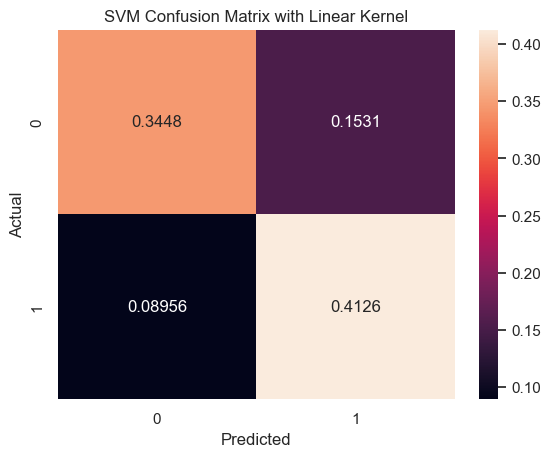

In [171]:
svmconf = confusion_matrix(y_test,log_pred)

sns.heatmap(svmconf/np.sum(svmconf),annot=True,fmt='0.4');
plt.title('SVM Confusion Matrix with Linear Kernel')
plt.ylabel("Actual")
plt.xlabel("Predicted");

In [172]:
print(classification_report(y_test,svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.57      0.68      7733
         1.0       0.68      0.90      0.78      7799

    accuracy                           0.74     15532
   macro avg       0.77      0.74      0.73     15532
weighted avg       0.77      0.74      0.73     15532



As we have used a Linear Kernel we can view the coefficients the model has given each variable

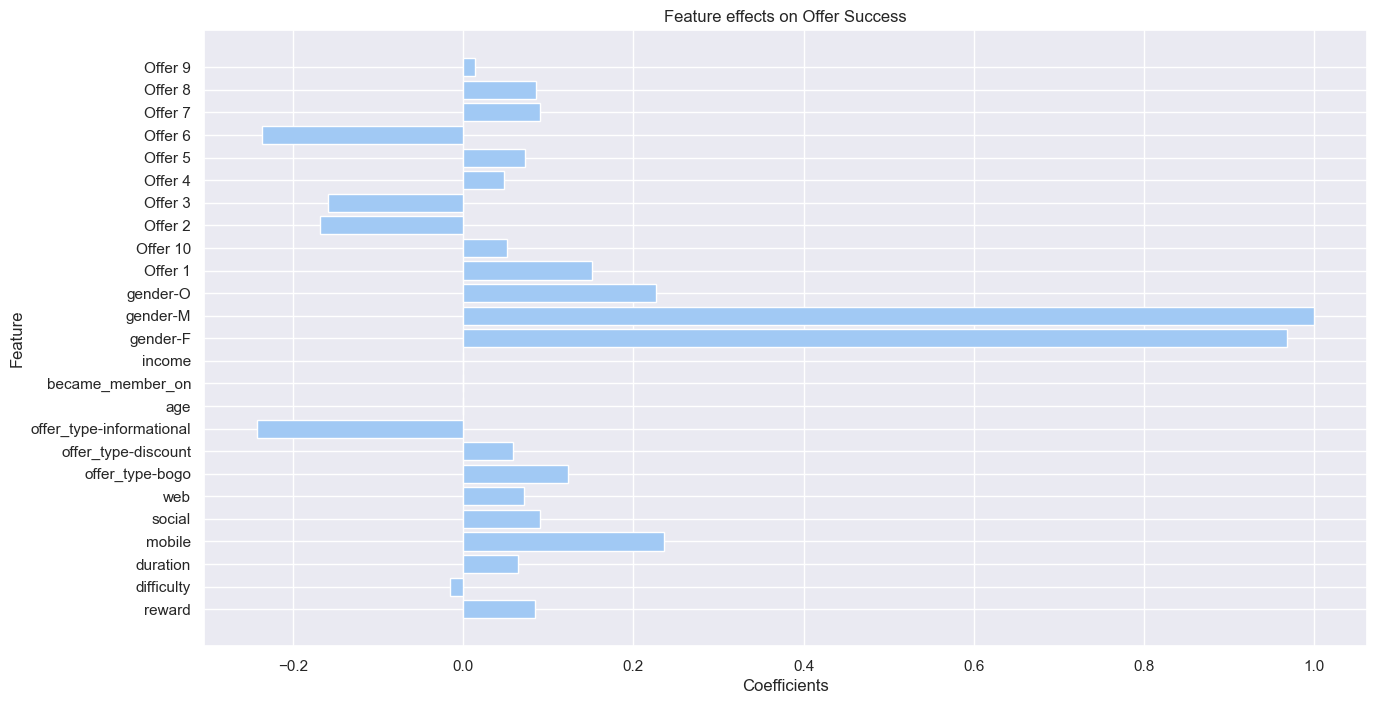

In [173]:
#Create a plot of the coefficients for a given feature.

feature_names = list(X.columns)
coefs = list(svc.coef_[0])



plt.figure(figsize=(15,8))
plt.barh(feature_names,coefs)
plt.title('Feature effects on Offer Success')
plt.xlabel('Coefficients')
plt.ylabel('Feature');

Now we change the kernel function to Radial Basic Function.

In [174]:
svc_model = SVC(C=1,gamma=1,kernel='rbf',cache_size=5000)

svc_model.fit(X_train,y_train)

SVC(C=1, cache_size=5000, gamma=1)

In [175]:
y_pred_svc_2 = svc_model.predict(X_test)
svc2_accuracy = accuracy_score(y_test,y_pred_svc_2)
svc2_f1 = f1_score(y_test,y_pred_svc_2)

In [176]:
print('Accuracy for SVM with RBF Kernel: %.3f' % svc2_accuracy)
print('F1 score for SVM with RBF Kernel: %.3f' % svc2_f1)

Accuracy for SVM with RBF Kernel: 0.777
F1 score for SVM with RBF Kernel: 0.790


Text(0.5, 20.049999999999997, 'Predicted')

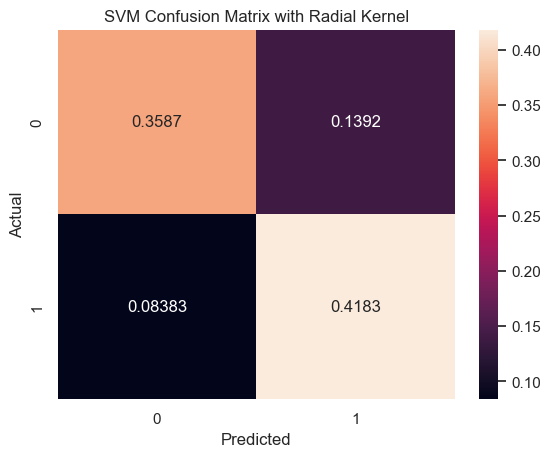

In [177]:
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test,y_pred_svc_2)

svmconf2 = confusion_matrix(y_test,y_pred_svc_2)
sns.heatmap(svmconf2/np.sum(svmconf2),annot=True,fmt='.4');
plt.title('SVM Confusion Matrix with Radial Kernel')
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [178]:
#Area under curve
roc_auc = auc(svc_fpr,svc_tpr)
roc_auc

0.776737251757666

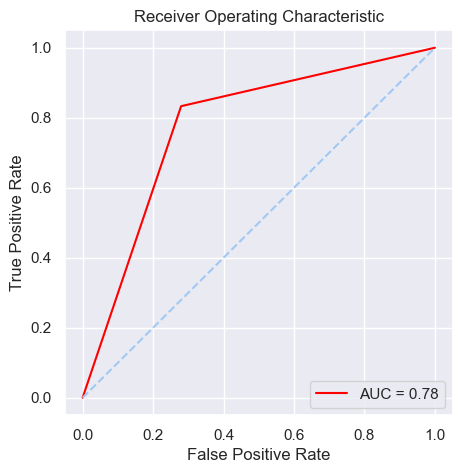

In [179]:
#Plot the auc 
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(svc_fpr,svc_tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

An ideal AUC score is 1 so a score of 0.78 is not too bad, it shows that the SVC classifier is somewhat accurate in distinguising successful and unsucessful offers. After changing a few of the parameters the model achieved an accuracy of 77.8% with an F1 Score of 0.79. 

The Radial Basic Function kernel has performed better than the Linear Kernel. We will now change the C parameter to 100 to limit overfitting ( however omitted the results as it was taking too much time and we dropped that analysis).


### 4. Linear Discriminant Analysis

We will now try to use Linear Discriminant Analysis to improve on our model accuracy. 

LDA is more sensity to outliers than the previous models. We  examined the age of the user and removed outliers and need to look at income and days being a rewards member. I will use the tukey rule to remove any outliers.

LDA assumes normal distribution for features so as a preprocessing step we will normalize the data points.


In [180]:
def split_df(over_df):
    '''
    Function to split X, Y from dataframe and split into test and train datasets.
    
    Input - over_df - dataframe with classes balanced.
    
    Output - X_train, X_test, y_train, y_test
    
    '''
    
    for col in ['income','became_member_on']:
        
        #Lower quartile
        Q1 = np.percentile(over_df[col],25)
        
        #Upper quartile
        Q3 = np.percentile(over_df[col],75)
        
        #Calculate interquartile range
        IQR = Q3 - Q1
        
        #Outlier step
        step = IQR * 1.5
        
        #Remove values that are greater than the upper quartile plus 1.5 times the IQR and lower than the lower quartile 
        #minus 1.5 times the IQR.
        over_df = over_df[(over_df[col] > (Q1 - step)) & (over_df[col] < (Q3 + step))]
    
    X = over_df.iloc[:,3:]
    
   
    y = over_df.iloc[:,2]
    
    X = pd.concat([X, over_df['offer_id']],axis=1)
    
    dummies = pd.get_dummies(X['offer_id'])
    
    X = pd.concat([X.drop('offer_id',axis=1), dummies],axis=1)
    X = X.drop(['email'],axis=1)
    
    
    
    X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
    
    return X_train, X_test, y_test, y_train


X_train, X_test, y_test, y_train = split_df(over_df)

X_train = normalize(X_train)
X_test = normalize(X_test)

In [181]:
lda = LinearDiscriminantAnalysis(solver='lsqr')

lda.fit(X_train,y_train)
y_pred = lda.predict(X_test)


In [182]:
lda_pred = lda.predict(X_test)
lda_accuracy = accuracy_score(y_test,lda_pred)
lda_f1 = f1_score(y_test,lda_pred)

print("LDA Model Accuracy: %.3f" % lda_accuracy)
print("LDA Model F1 Accuracy: %.3f" % lda_f1)

LDA Model Accuracy: 0.762
LDA Model F1 Accuracy: 0.781


In [183]:
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.67      0.74      7297
         1.0       0.72      0.85      0.78      7189

    accuracy                           0.76     14486
   macro avg       0.77      0.76      0.76     14486
weighted avg       0.77      0.76      0.76     14486



Text(0.5, 1.0, 'LDA Confusion Matrix')

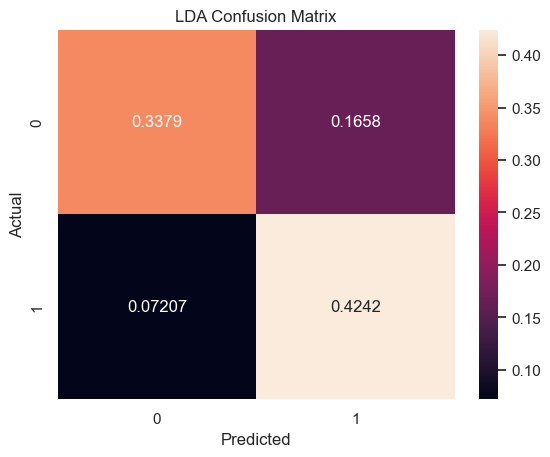

In [184]:
ldaconf = confusion_matrix(y_test,lda_pred)
sns.heatmap(ldaconf/np.sum(ldaconf),annot=True,fmt='.4')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('LDA Confusion Matrix')

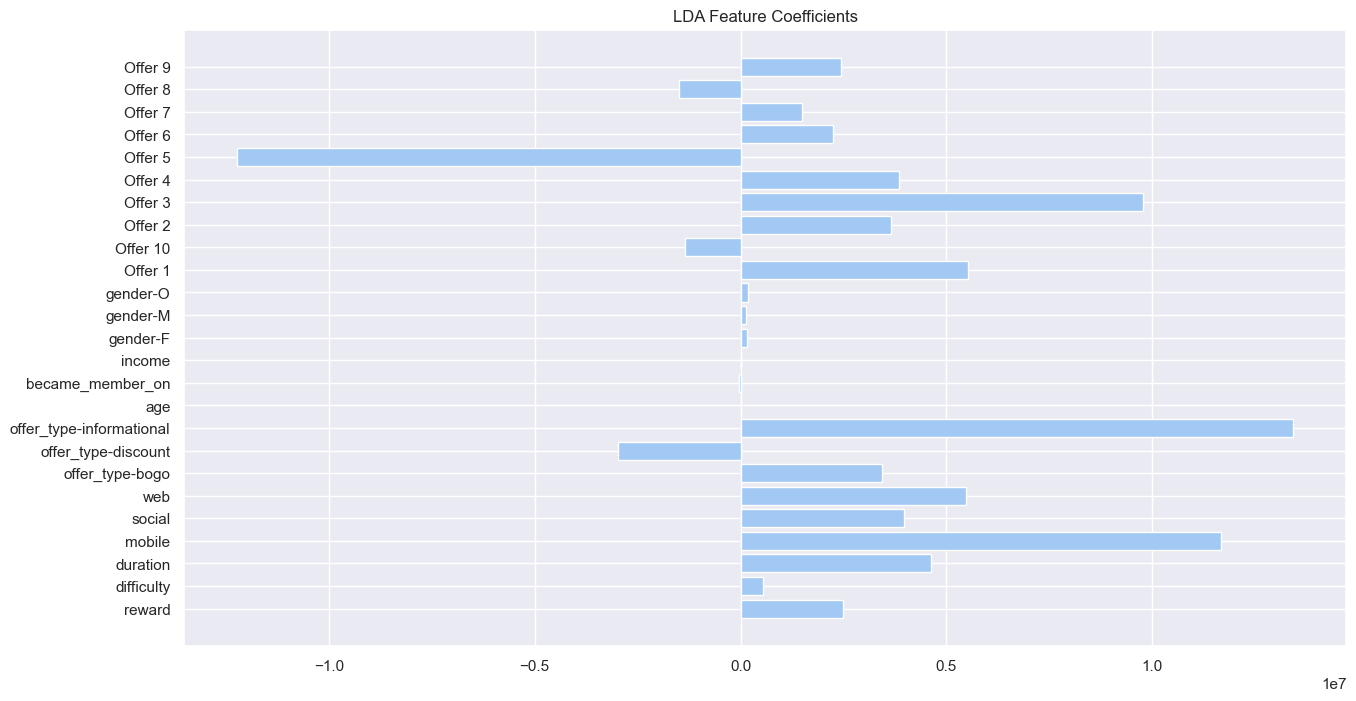

In [185]:
plt.figure(figsize=(15,8))
####feature_names_ld = list(X.columns)
coefs = list(lda.coef_[0])

plt.barh(feature_names,coefs)
plt.title("LDA Feature Coefficients");

In [186]:
lda_fpr,lda_tpr,lda_thresholds = roc_curve(y_test,y_pred)
lda_auc = auc(lda_fpr,lda_tpr)
lda_auc

0.7628008797034389

The LDA model performed equally well as the SVC model annd both performed better than the logisitic regression model.

### 5. Adaboost Classifier


Adaboost is a decision tree algorithm that does not require scaled data, however, it is sensitive to outliers so we will use the training dataset and test dataset where outliers have been removed.

In [187]:
#####used only 2 parametrizations for faster turnaround

parameters = {'n_estimators':[500, 2000], ### 1000, 1500 
              'learning_rate':[0.05,0.2]}   #   0.1, 0.15

In [188]:
ada = AdaBoostClassifier()

clf = GridSearchCV(ada,parameters,cv=3,verbose=3,n_jobs=-1)

clf.fit(X_train,y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.2],
                         'n_estimators': [500, 2000]},
             verbose=3)

In [189]:
clf.best_params_

{'learning_rate': 0.2, 'n_estimators': 2000}

In [190]:
ada_pred = clf.predict(X_test)
ada_accuracy = accuracy_score(y_test,ada_pred)
ada_f1 = f1_score(y_test, ada_pred)

print("ADA Model Accuracy: %.3f" % ada_accuracy)
print("ADA Model F1 Accuracy: %.3f" % ada_f1)

ADA Model Accuracy: 0.765
ADA Model F1 Accuracy: 0.784


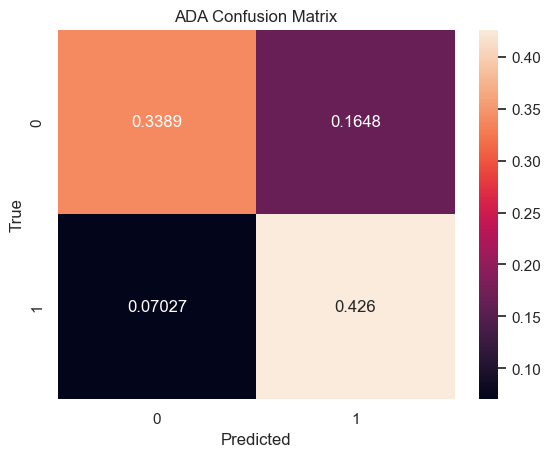

In [191]:
adaconf = confusion_matrix(y_test,ada_pred)
sns.heatmap(adaconf/np.sum(adaconf),annot=True,fmt='.4')
plt.title("ADA Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True');

In [192]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74      7297
         1.0       0.72      0.86      0.78      7189

    accuracy                           0.76     14486
   macro avg       0.77      0.77      0.76     14486
weighted avg       0.78      0.76      0.76     14486



In [193]:
ada_fpr,ada_tpr,ada_thresholds = roc_curve(y_test,ada_pred)
ada_auc = auc(ada_fpr,ada_tpr)
ada_auc

0.7655684963092377

### 6. Random Forest Classifier On Balanced dataset

Now, we will look into Random Forrest Classifier on the same binary class balanced dataset and try to figure out the performance of the model using the metrics we chose.

In [194]:
clf_r = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=42)

In [195]:
clf_r.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [196]:
rf_pred = clf_r.predict(X_test)

rf_accuracy = accuracy_score(y_test,rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print('Model accuracy: {0:0.4f}'.format(accuracy_score(y_test,rf_pred)))
confusion_rf = confusion_matrix(y_test,rf_pred)

Model accuracy: 0.8174


In [237]:
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74      7297
         1.0       0.72      0.86      0.78      7189

    accuracy                           0.76     14486
   macro avg       0.77      0.77      0.76     14486
weighted avg       0.78      0.76      0.76     14486



Text(0.5, 1.0, 'RF Confusion Matrix')

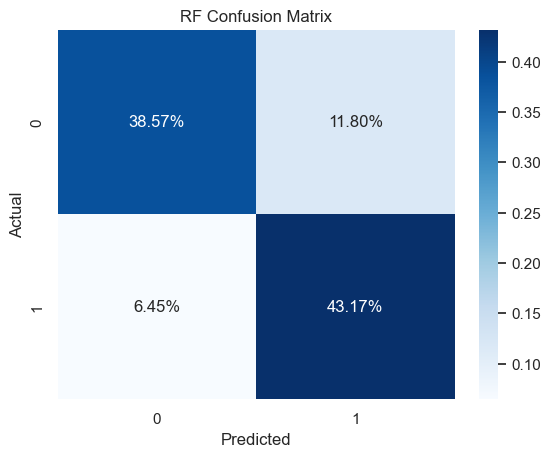

In [197]:
#sns.heatmap(confusion,annot=True);
sns.heatmap(confusion_rf/np.sum(confusion_rf), annot=True, fmt='.2%', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual");
plt.title("RF Confusion Matrix")

In [198]:
rf_fpr,rf_tpr,rf_thresholds = roc_curve(y_test,rf_pred)
rf_auc = auc(rf_fpr,rf_tpr)
rf_auc

0.8177986528800023

In [238]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      7297
         1.0       0.79      0.87      0.83      7189

    accuracy                           0.82     14486
   macro avg       0.82      0.82      0.82     14486
weighted avg       0.82      0.82      0.82     14486



<BarContainer object of 25 artists>

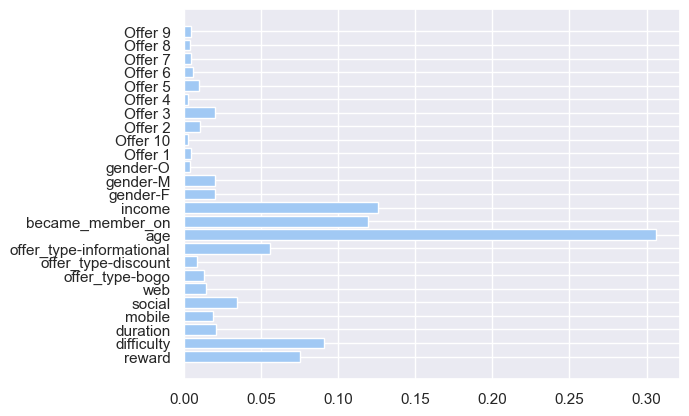

In [235]:
clf_r.feature_importances_
plt.barh(feature_names, clf_r.feature_importances_)

### Findings: Intepretation from the RF Model on Balanced dataset

After balancing the classes in our dataet, the RFClassifier has drastically improved accuracy to close to 82% which is encouraging and tells us, how we may need to tackle data for better models by cleaning data and understanding the data.  

## Compare Models

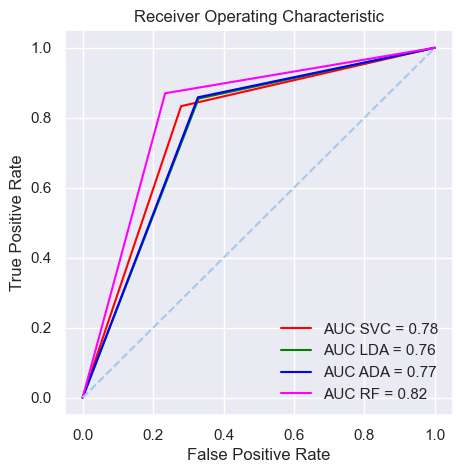

In [236]:
#Plot the auc 
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(svc_fpr,svc_tpr, color='red',label = 'AUC SVC = %0.2f' % roc_auc)
plt.plot(lda_fpr,lda_tpr,color='green',label = 'AUC LDA = %0.2f' % lda_auc)
plt.plot(ada_fpr,ada_tpr,color='blue',label='AUC ADA = %0.2f' % ada_auc)
plt.plot(rf_fpr,rf_tpr,color='magenta',label='AUC RF = %0.2f' % rf_auc)

plt.legend(loc = 'lower right',frameon=False)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

In [200]:
accuracy = np.array([rf_accuracy, log_accuracy,log2_accuracy,svc_accuracy,svc2_accuracy,lda_accuracy,ada_accuracy]).reshape(-1,1)
f1_score = np.array([rf_f1, log_f1_score,log2_f1,svc_f1,svc2_f1,lda_f1,ada_f1]).reshape(-1,1)

metrics = pd.DataFrame(np.concatenate((accuracy,f1_score),axis=1),columns=['Accuracy','F1 Score'])

model_names = np.array(['RF Classifier', 'Logistic Regression No Penalty','Logistic Regression With Penalty','SVC Linear','SVC RBF','LDA','ADA']).reshape(-1,1)

metrics = pd.concat([metrics,pd.DataFrame(model_names)],axis=1)

metrics.columns = ['Accuracy','F1 Score','Model Names']

metrics.set_index('Model Names').sort_values(by='Accuracy',ascending=False)

,Accuracy,F1 Score
Model Names,,
RF Classifier,0.817410,0.825447
SVC RBF,0.776977,0.789525
ADA,0.764876,0.783719
LDA,0.762115,0.781012
Logistic Regression With Penalty,0.757468,0.772840
Logistic Regression No Penalty,0.757340,0.772746
SVC Linear,0.737445,0.775441


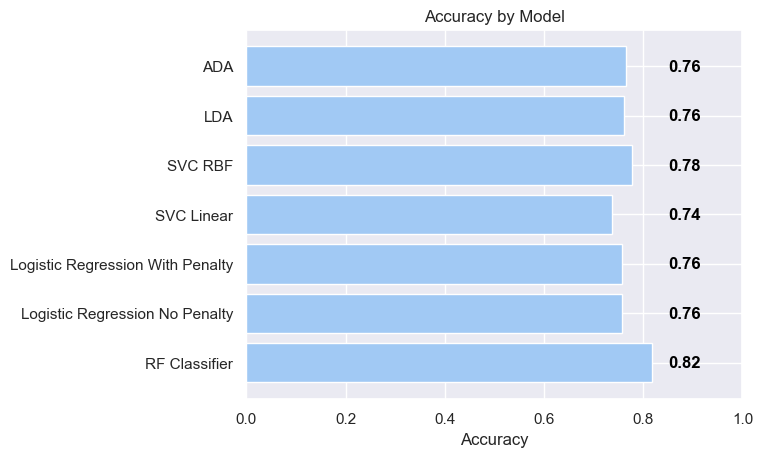

In [201]:
plt.barh(metrics['Model Names'],metrics['Accuracy']);
plt.xlabel('Accuracy')
plt.title('Accuracy by Model')
plt.xlim([0,1])


labels = ['%.2f' % x for x in metrics['Accuracy']]


for i,v in enumerate(metrics['Accuracy']):
    plt.gca().text(0.85, i - 0.1, labels[i], color='black', fontweight='bold')

The RF model produced the model with the highest accuracy, F1 score and AUC score. 

### 6. Sequential NN (Deep Learning)


We try to use a DL model to find how it compares comared to other standard ML models. 

In [202]:
import tensorflow as tf
import keras

In [203]:
ann = keras.models.Sequential()

In [204]:
ann.add(keras.layers.Dense(6, activation='relu'))
ann.add(keras.layers.Dense(6, activation='relu'))
ann.add(keras.layers.Dense(4, activation = 'softmax'))

In [205]:
ann.compile(optimizer = 'adam', 
            loss = 'sparse_categorical_crossentropy', 
            metrics = ['accuracy'])

In [206]:
ann_history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=100)

Epoch 1/15
580/580 [==============================] - 4s 4ms/step - loss: 0.8974 - accuracy: 0.4981 - val_loss: 0.7077 - val_accuracy: 0.4963
Epoch 2/15
580/580 [==============================] - 2s 3ms/step - loss: 0.6994 - accuracy: 0.4963 - val_loss: 0.6960 - val_accuracy: 0.4963
Epoch 3/15
580/580 [==============================] - 2s 3ms/step - loss: 0.6949 - accuracy: 0.4995 - val_loss: 0.6942 - val_accuracy: 0.4963
Epoch 4/15
580/580 [==============================] - 2s 3ms/step - loss: 0.6941 - accuracy: 0.4973 - val_loss: 0.6938 - val_accuracy: 0.4963
Epoch 5/15
580/580 [==============================] - 2s 3ms/step - loss: 0.6938 - accuracy: 0.4996 - val_loss: 0.6936 - val_accuracy: 0.5037
Epoch 6/15
580/580 [==============================] - 2s 3ms/step - loss: 0.6935 - accuracy: 0.5004 - val_loss: 0.6940 - val_accuracy: 0.4963
Epoch 7/15
580/580 [==============================] - 2s 3ms/step - loss: 0.6935 - accuracy: 0.4977 - val_loss: 0.6933 - val_accuracy: 0.5037
Epoch 

In [207]:
ann.summary()       
# Summary of our model 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 156       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 4)                 28        
                                                                 
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________


In [208]:
ann.history.params

{'verbose': 1, 'epochs': 15, 'steps': 580}

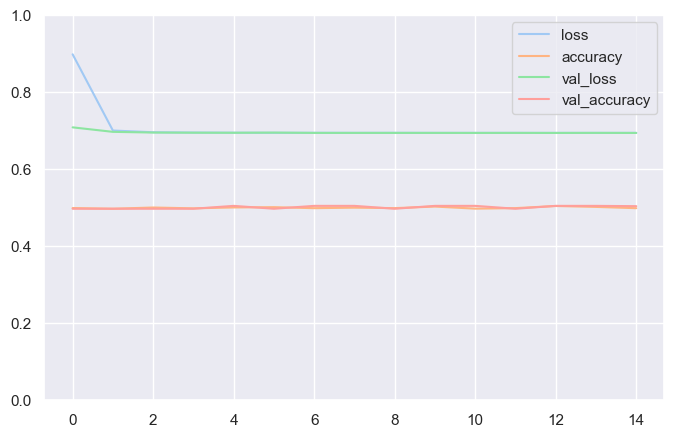

In [209]:
pd.DataFrame(ann.history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)               # Y AXIS RANGE LIMIT 
plt.show()

In [210]:
ann.evaluate(X_test , y_test)

453/453 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5030


[0.6931487321853638, 0.5029683709144592]

DL model fared poorly and the minimum number of hidden layers or activation function may have influenced the outcome.  

<a id="7"></a>
# 8. Results & Conclusion

From an exploratory data analysis perspective, we figured out that 

* Customers income ranges from 30,000 and 120,000 with most of the customers’ incomes fall between 50,000 and 75,0000.
* According to the available data, there were three ‘gender’ categories into which the customers falls in ( M, F and O). Keeping in our mind the above observation that there are 2175 missing values, Male Customers (8484 men) are more than Female Customers(6129 women) with 57% of customers are Males compared to 41% Females. However, there are 212 customers chose “O” as their gender.
* The most common offer type among all age groups is the BOGO , followed by the Discount Offers. Whereas, the least common offer to be sent is the informational offers. It can be surmised that BOGO offers are more attractive compared to other offers provided by Starbucks.
* Customers with High income (Above 90,000) are mostly female customers. Whereas, Average Income(30,000 - 60,000) customers are mostly males.
* Males and Females are pretty close when it comes to the time spent to complete an offer. Both males and females take about 17 days to da so.
* 2017 was the best year for Starbucks in terms of the number of new members. Around %38 of all the customers on our dataset registered as members on this specific year.
* Both genders like BOGO and Discount offers and they have the same reaction toward Informational offers, they both seem to be not interested to it.
* The mean time it takes a customer to complete an offer is less than 16 days (372 hours).
* Females completed around 75% of the offers they viewed, it is 16% more than males who just completed 58% of the offers they viewed. Feamles seems to be convinced by the promotion easier than males.

From a modeling perspective, the project was set out to determine if a particular customer will respond to an offer or not. Following Data Exploration and Cleaning, the project involved training muliple classifiers namely: Logistic Regression, Random Forest Classifier, SVM, Linear Discriminant Analysis, ADA Boost and Sequential ANN. Their scores were measured to determine the model that performs best.The data was highly imbalanced ( RF was the only algorithm we used on imbalanced data as well as balanced dataset) and we do sampling to make a balanced data set. We found out that RF fared as the best model with the metrics we chose and SVM with a radial kernel came second SVM with radial kernel. The predictions were measured with a confusion matrix, to identify the true and false predictions. After performing the conventional ML modeling we used Keras to build a deep learning model ( minimum number of hidden layers) to check the performance and see that it fared between RF and other ones. However, in this regards it showed that DL model fared pretty poorly. 


The main features we extract from RF feature importance matrix, which came out of the data modeling is age which aligns well with our EDA findings. However, along with  age, income, offer class, mode of offer duration of membership, difficulty and reward. 


# 9. Possible Improvements

As part of an improvement task, we can try out PCA to find out newer dimenstions leading to exploring different customer segments based on the amount spent across each offer category. Comparing these distributions with the distributions we performed earlier, might give use much more information about which individuals to send different offer codes.


One improvement we can do to the model is splitting the train and test data set based on the offer so that we can see exactly if a user has completed the offer or not. But this will take more time to process and split the data set and need to set up complex algorithm too.


Better predictions may have been deducted if there were more customer metrics. For this analysis, I feel we had limited information about customers available to us just age, gender, and income. To find optimal customer demographics, it would be nice to have a few more features of a customer. These additional features may aid in providing better classification model results data in order to have a better model.

Additionally initially it seemed like we had a lot of data to work, but once NaN values and duplicate columns were dropped and the data were combined into one single dataset, it felt as though the models might have benefited from more data. With more data, the classification models may have been able to produce better F1-score results.

Also, we can improve this project by taking up another problem statement, we can make a model that predicts which demographic groups will make purchases even if they don’t receive an offer.

We have not done it here, but based on the results we got any other moodel refinement may not help. We need to perform cross validation as well as Grid Search CV to improve the model/models.

We also need to improve model accuracy by fine tuning the models or trying tree models

# 10. Future Directions


The transcript data needs more massaging and we can do some more feature engineering to assign an amount based on a succesful transaction.

We may look into the bias of the chnnels used for promotion and how much it effects the offer completion rate, whether its via email, web or so on and can design A/B tests to do that which will bring more clarity to the model building. 

To make the result more comparable, we can try evenly split the members into groups and sending the same offer through different channels per person. That will be a more consistent and systmatic nalysis to look into the data for generating robust models. 

We will also look to get some more data to build a model that can predict which kind of offers to be sent to whcihc customer?and trying to construct a model that can predict which customers would buy any way ( regardless if there is an offer or not)

In [220]:
####!!jupyter nbconvert *.ipynb
#########!!jupyter nbconvert --to html *.ipynb